# Numerical Methods
## Python Project: Stochastic Volatility Inspired Model

<img src='https://mir-s3-cdn-cf.behance.net/project_modules/fs/53d64237109175.573659de25f63.jpg' alt='Bloomberg' title='Bloomberg'>

*By Lucas Martins & Adrien Verdolini*
  
The **Black-Scholes Model**, introduced in 1973 by Fischer Black, Myron Scholes, and Robert Merton, has been a cornerstone in option pricing theory, revolutionizing the way financial derivatives are valued.  
  
However, as financial markets have evolved, researchers and practitioners alike have become increasingly aware of the limitations of the Black-Scholes model, particularly when it comes to capturing the nuances of market volatility. While the model assumes a **constant and deterministic volatility**, the reality of financial markets often involves time-varying and stochastic volatility patterns. One way that practioners handle this problem is
to create **implied volatility surfaces**.

Some improvements of the constant volatility were proposed, the **Stochastic Volatility Models** and the **Local Volatility Models**.

- **Stochastic Volatility:**  Instead of treating volatility as fixed, these models introduce a dynamic element, allowing volatility to evolve over time according to a stochastic process. One of the most well-known stochastic volatility models is the Heston model, proposed by Steve Heston in 1993. 

- **Local Volatility:** Local volatility models, on the other hand, aim to capture the volatility smile or skew observed in option prices. Unlike stochastic volatility models, local volatility models assume that the instantaneous volatility is a deterministic function of both time and the underlying asset price.

In this python project, we will seek to capture the volatility surface and calibrate it in order to create a **free-arbitrage volatility surface**. To succeed to this task, we will implement the **SVI model** and its extensions. Deviations from the smoothness of the volatility surface can create mispricings, allowing traders to exploit arbitrage opportunities through **butterfly spread**. And a **calendar spread** can exploit discrepancies in implied volatility across different maturities. If the implied volatility term structure is not consistent, a trader may identify opportunities to profit from changes in volatility over time.


---

### Content

- **[Introduction](#Introduction)**

  - [Install Package](#Install-Package)
  - [Import Package](#Import-Package)
  - [DataFrame Setting](#DataFrame-Setting)
  - [Graph Design](#Graph-Design)  
 
  
- **[I. Volatility Surface from Market](#I.-Volatility-Surface-from-Market)**
    - [1. Call & Put Option Chain](#1.-Call-&-Put-Option-Chain)
        - [1.1. Maturity](#1.1.-Maturity)
        - [1.2. Call Option Chain](#1.2.-Call-Option-Chain)
        - [1.3. Put Option Chain](#1.3.-Put-Option-Chain)
 
    - [2. Implied Volatility Smile](#2.-Implied-Volatility-Smile)
         - [Log-Moneyness](#Log-Moneyness)
         - [SOFR](#SOFR)
        
    - [3. Implied Volatility Term Structure](#3.-Implied-Volatility-Term-Structure)
    - [4. Implied Volatility Surface](#4.-Implied-Volatility-Surface)

  
- **[II. Stochastic Volatility Inspired](#II.-Stochastic-Volatility-Inspired)**

    - [1. Raw SVI Parameterization](#1.-Raw-SVI-Parameterization)
 
    - [2. Raw SVI Parameters Interpretation](#2.-Raw-SVI-Parameters-Interpretation)
        - [$a$: Overall Level of Variance](#$a$:-Overall-Level-of-Variance )
        - [$b$: Vol-of-Vol](#$b$:-Vol-of-Vol)
        - [$\rho$: Skew](#$\rho$:-Skew)
        - [$m$: Horizontal Translation](#$m$:-Horizontal-Translation)
        - [$\sigma$: Determines How Smooth the Vertex is](#$\sigma$:-Determines-How-Smooth-the-Vertex-is)
  
    - [3. Raw SVI Calibration](#3.-Raw-SVI-Calibration)
        - [3.1. Least Square Objective Function](#3.1.-Least-Square-Objective-Function)
        - [3.2. Perfect Calibration](#3.2.-Perfect-Calibration)
        - [3.3. Axel Vogt Calibration](#3.3.-Axel-Vogt-Calibration)
        - [3.4. Market Calibration](#3.4.-Market-Calibration)

    - [4. Raw SVI Calibration Improvement](#4.-Raw-SVI-Calibration-Improvement)
 
  
- **[III. Other SVI Parameterizations](#III.-Other-SVI-Parameterizations)**
    - [1. Natural SVI Parameterization](#1.-Natural-SVI-Parameterization)
         - [1.1. Heston Model](#1.1.-Heston-Model)
         - [1.2. Raw SVI & Natural SVI Equivalences](#1.2.-Raw-SVI-&-Natural-SVI-Equivalences)


    - [2. Jump-Wing SVI Parameterization](#2.-Jump-Wing-SVI-Parameterization)
        - [2.1. Jump-Wing SVI Parameterization Characteristic](#2.1.-Jump-Wing-SVI-Parameterization-Characteristic)
        - [2.2. Raw SVI & Jump-Wing SVI equivalence](#2.2.-Raw-SVI-&-Jump-Wing-SVI-equivalence) 
  
  
- **[IV. Arbitrage-Free SVI Surface](#IV.-Arbitrage-Free-SVI-Surface)**
    - [1. Calendar Spread Arbitrage](#1.-Calendar-Spread-Arbitrage)
 
    - [2. Butterfly Arbitrage](#2.-Butterfly-Arbitrage)
        - [2.1. Butterfly Spread Payoff](#2.1.-Butterfly-Spread-Payoff)
        - [2.2. Discounted Risk-Neutral Density](#2.2.-Discounted-Risk-Neutral-Density)
            - [Axel Vogt Density](#Axel-Vogt-Density)
        - [2.3. No-arbitrage by conditions](#2.3.-No-arbitrage-by-conditions)
            - [Axel Vogt Example](#Axel-Vogt-Example)
            - [Market Example](#Market-Example)

    - [3. Surface Free of Static Arbitrage](#3.-Surface-Free-of-Static-Arbitrage)

- **[V. References](#V.-References)**

---

## Introduction

#### Install Package
- **Numpy:** manage arrays
- **Pandas:** deals with DataFrame
- **Scipy:** statistical tools
- **Matplotlib:** library to display graphs
- **Plotly:** Generate 3D graphs
- **Yfinance:** import financial data from Yahoo Finance

In [1]:
#!pip install numpy

In [2]:
#!pip install pandas

In [3]:
#!pip install scipy

In [4]:
#!pip install matplotlib

In [5]:
#!pip install plotly

In [6]:
#!pip install yfinance

#### Import Package

In [7]:
"""
Import Libraries
"""

# Manage date and time
import datetime as dt

# Deals with array
import numpy as np

# Deals with DataFrame
import pandas as pd

# Use statistic and math tools
import scipy as sci

# Solve optimisation problem
from scipy.optimize import minimize

# Display graphs
import matplotlib.pyplot as plt

# Import data from Yahoo Finance
import yfinance as yf

In [8]:
# Display advanced graph (like 3D projection)
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio

pyo.init_notebook_mode()

#### DataFrame Setting

In [9]:
"""
Manage the DataFrame display
"""

# Set the maximum DataFrame rows displayed as 10
pd.options.display.max_rows = 10

#### Graph Design

In [10]:
"""
Manage the graph design
"""

# Use a style to improve graphs
plt.style.use('seaborn-v0_8')

# Set a larger size for the graphs
plt.rcParams['figure.figsize'] = (12, 6)

## I. Volatility Surface from Market
### 1. Call & Put Option Chain

An **option chain**, also known as an options matrix, is a listing of all available options for a particular security. It provides a comprehensive view of the various option contracts, including call options and put options, associated with a specific underlying asset such as a stock or an index.

In [11]:
def get_option_maturity(ticker: str) -> list[str]:
    """
    Seeking option maturity from Yahoo Finance

    Args:
        ticker (str):
            Ticker of the underlying

    Returns:
        available_maturity (list[str]):
            List of every available maturity in Yahoo Finance
    """

    # Get all the Yahoo Finance data of the asset
    ticker_data = yf.Ticker(ticker)

    # Get the option's available maturity 
    available_maturity = ticker_data.options

    return available_maturity

#### 1.1. Maturity

In [12]:
# For this example, we will take the AAPL's options
underlying = 'AAPL'

# We looking for the available maturity 
available_expiry = get_option_maturity(underlying)

available_expiry

('2024-03-08',
 '2024-03-15',
 '2024-03-22',
 '2024-03-28',
 '2024-04-05',
 '2024-04-12',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18')

In [13]:
def filtered_option_chain(option_chain, itm: bool=True) -> pd.core.frame.DataFrame:
    """
    Filtered the option chain with ITM or OTM style
    By default, it filters with ITM options

    Args:
        option_chain (pd.core.frame.DataFrame):
            The initial option chain to filter

        itm (bool):
            If True, only keep ITM option, otherwise keep OTM options

    Returns:
        filtered_option_chain (pd.core.frame.DataFrame):
            The filtered option chain
    """

    # Filtered option chain, only keep ITM option
    filtered_option_chain = option_chain.loc[option_chain['ITM'] == itm]

    return filtered_option_chain

In [14]:
def get_option_chain(
    ticker: str,
    maturity: str=None,
    money_style: str=None,
) -> pd.core.frame.DataFrame:
    """
    Seeking the option chain on Yahoo Finance

    Args:
        ticker (str):
            Ticker of the underlying

        maturity (str):
            Specify a maturity, otherwise use the nearest maturity

        money_style (str):
            If specify as 'ITM' or 'OTM', only keep these options 

    Returns:
        call_chain (pd.core.frame.DataFrame):
            Call option chain from Yahoo Finance

        put_chain (pd.core.frame.DataFrame):
            Put option chain from Yahoo Finance
    """

    # Get all the Yahoo Finance data of the asset
    ticker_data = yf.Ticker(ticker)

    # Get the option chain for put and call, and derivatives data
    call_chain, put_chain = ticker_data.option_chain(maturity)[:2]
    
    """
    Format the DataFrame
    """
    # Set the strike as the index
    call_chain.set_index('strike', inplace=True)
    put_chain.set_index('strike', inplace=True)

    # Set the filter for the Dataframes
    filter = ['contractSymbol', 'lastTradeDate', 'lastPrice', 'volume', 'impliedVolatility', 'inTheMoney']

    # Only keep the key information
    call_chain = call_chain[filter]
    put_chain = put_chain[filter]

    # Set the columns name
    columns_name = ['Symbol', 'Last Trade', 'Price', 'Volume', 'Implied Volatility', 'ITM']
    
    # Rename the columns
    call_chain.columns = columns_name
    put_chain.columns = columns_name

    # Filtered data to only keep ITM or OTM option
    if money_style == 'ITM':
        # Filtered option chain, only keep ITM option
        call_chain = filtered_option_chain(call_chain)
        put_chain = filtered_option_chain(put_chain)

    elif money_style == 'OTM':
        # Filtered option chain, only keep OTM option
        call_chain = filtered_option_chain(call_chain, itm=False)
        put_chain = filtered_option_chain(put_chain, itm=False)

    return call_chain, put_chain

In [15]:
# Get the neares maturity
maturity = available_expiry[0]

# Get the call and put option chain
call_chain, put_chain = get_option_chain(underlying, maturity)

#### 1.2. Call Option Chain

In [16]:
call_chain

Symbol                Last Trade  Price  Volume  \
strike                                                                 
100.0   AAPL240308C00100000 2024-03-05 18:27:04+00:00  70.56     1.0   
105.0   AAPL240308C00105000 2024-02-29 20:48:27+00:00  75.38     NaN   
110.0   AAPL240308C00110000 2024-03-04 19:41:18+00:00  65.40     2.0   
115.0   AAPL240308C00115000 2024-02-22 14:40:44+00:00  68.30     1.0   
125.0   AAPL240308C00125000 2024-03-01 19:58:21+00:00  55.18     2.0   
...                     ...                       ...    ...     ...   
240.0   AAPL240308C00240000 2024-03-04 14:30:10+00:00   0.01     1.0   
245.0   AAPL240308C00245000 2024-03-04 16:43:07+00:00   0.01   500.0   
255.0   AAPL240308C00255000 2024-03-04 14:32:01+00:00   0.01     1.0   
260.0   AAPL240308C00260000 2024-03-05 15:37:28+00:00   0.01     2.0   
265.0   AAPL240308C00265000 2024-03-05 20:26:53+00:00   0.01    32.0   

        Implied Volatility    ITM  
strike                             
100.0             2.589847   True  
105.0             2.226567   True  
110.0             1.812501   True  
115.0             1.964844   True  
125.0             1.539065   True  
...                    ...    ...  
240.0             1.218754  False  
245.0             0.500005  False  
255.0             1.406253  False  
260.0             1.468753  False  
265.0             1.531252  False  

[47 rows x 6 columns]

#### 1.3. Put Option Chain

In [17]:
put_chain

Symbol                Last Trade  Price  Volume  \
strike                                                                 
100.0   AAPL240308P00100000 2024-03-05 19:29:55+00:00   0.01       3   
105.0   AAPL240308P00105000 2024-02-26 14:32:02+00:00   0.01     104   
110.0   AAPL240308P00110000 2024-02-26 18:23:52+00:00   0.01       1   
115.0   AAPL240308P00115000 2024-03-04 14:31:30+00:00   0.01       1   
120.0   AAPL240308P00120000 2024-03-05 14:38:18+00:00   0.01       1   
...                     ...                       ...    ...     ...   
215.0   AAPL240308P00215000 2024-02-14 20:48:45+00:00  31.03       1   
220.0   AAPL240308P00220000 2024-02-15 17:15:23+00:00  37.85     301   
225.0   AAPL240308P00225000 2024-02-15 16:44:13+00:00  42.93       1   
230.0   AAPL240308P00230000 2024-03-01 15:04:06+00:00  50.82       1   
265.0   AAPL240308P00265000 2024-03-05 16:18:08+00:00  94.25       3   

        Implied Volatility    ITM  
strike                             
100.0             1.875001  False  
105.0             1.687502  False  
110.0             1.531252  False  
115.0             1.375003  False  
120.0             1.250004  False  
...                    ...    ...  
215.0             0.984375   True  
220.0             1.281254   True  
225.0             1.455081   True  
230.0             1.583986   True  
265.0             2.027349   True  

[42 rows x 6 columns]

### 2. Implied Volatility Smile

A volatility smile refers to the pattern observed in the implied volatility of options with the same expiration date but different strike prices. Instead of assuming a constant volatility, as the traditional Black-Scholes model does, the volatility smile recognizes that implied volatilities can vary across different strike prices.

The presence of a volatility smile challenges the assumptions of the Black-Scholes model, which assumes a constant and deterministic volatility. The smile is often attributed to factors such as market expectations of future volatility, changes in supply and demand for options, and the impact of market events on option pricing.

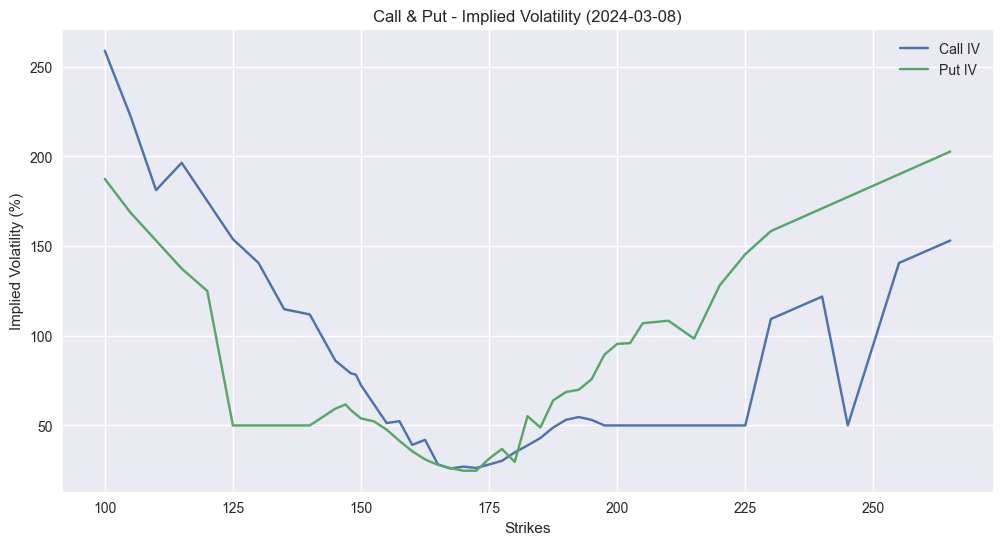

In [18]:
"""
Display the market's Put & Call Implied Volatility Smile
"""

# Display the market call implied volatility
plt.plot(call_chain.index, call_chain['Implied Volatility'] * 100)

# Display the market put implied volatility
plt.plot(put_chain.index, put_chain['Implied Volatility'] * 100)

# Set the title, axis label, and legend
plt.title(f'Call & Put - Implied Volatility ({maturity})')
plt.xlabel('Strikes')
plt.ylabel('Implied Volatility (%)')
plt.legend(['Call IV', 'Put IV']);

In this scenario, it becomes evident that the **put-call parity** principle cannot be maintained. The implied volatility for puts significantly surpasses that of calls, and noticeable **jumps appear in the volatility smile**.

Such an option chain configuration is unlikely to exist in the market, as it would present **arbitrage opportunities** for numerous participants. Not only would there be potential arbitrage on put-call parity, but participants could also exploit the volatility smile using strategies like **butterfly** or **bull spreads**. Additionally, arbitrage on the volatility term structure could be pursued through **calendar spreads**.

A thorough examination of these arbitrage opportunities will be undertaken in the subsequent section dedicated to the Stochastic Volatility Inspired model.

To address these discrepancies, we intend to reshape the volatility smile by adjusting the out-of-the-money (OTM) options, aiming to establish a consistent volatility smile for both put and call options.

---

In [19]:
def convert_date_to_DTE(
    date: str,
) -> float:
    """
    Convert the date in DTE for option calculation

    Args:
        date (str):
            The date to convert as DTE format

    Returns:
        dte (float):
            Day To Expirations (Format for option pricing)
    """

    # Split the string to have year, month, and day
    year, month, day = date.split('-')

    # Format the end date
    end_date = dt.date(year=int(year), month=int(month), day=int(day))

    # Get the today date
    today = dt.date.today()

    # Get the number of day in one year
    days_per_year = np.busday_count(dt.date(int(year), 1, 1), dt.date(int(year), 12, 31))

    # Calculate the Days To Expiration
    dte = np.busday_count(today, end_date) / days_per_year
    
    return dte

#### SOFR
**SOFR** stands for the **Secured Overnight Financing Rate**. It is a key interest rate that serves as a benchmark for U.S. dollar-denominated derivatives and other financial instruments.  
This interest rate is widely used as **risk-free rate** benchmark.

In [20]:
def get_SOFR() -> float:
    """
    Get the SOFR rate from Yahoo Finance

    Returns:
        sofr_rate (float):
            Risk-Free rate, here we use the SOFR
    """

    # Get the SOFR future price from Yahoo Finance
    sofr_future = yf.Ticker('SR1=F')

    # Calculate the SOFR rate
    sofr_rate = 1 - sofr_future.info['previousClose']/100

    return sofr_rate

#### Log-Moneyness
There is different ways to express the strike axis: **moneyness**, **log-moneyness**, or **strike delta**. In our case, we will prefer the log-moneyness, it avoids confusion and allows to express the strike in term of distance of the forward.
  
$$
    \text{log-moneyness}: k = \log \bigg(\frac{K}{S_t \exp^{r(T-t)}} \bigg)
$$

The use of natural logarithm in log-moneyness is particularly common when dealing with financial assets because it helps in capturing the percentage change rather than the absolute change.
  
$S_T \exp^k = S_T \exp^{\log(\frac{K}{F_T})} = S_T \times \frac{K}{F_T} = S_T \times \frac{K}{S_T \exp^{rT}} = K \exp^{-rT}$

> One of the main drawbacks of Yahoo Finance is its use of the strike instead of the forward strike. Consequently, the ITM and OTM options may be inaccurate for long-term maturities. This discrepancy can lead to a distortion in the implied volatility smile due to the incorrect ATM strike, which defines the OTM put and call options.

---

In [21]:
def strike_to_logmoneyness(
    price: float,
    strike_array: np.ndarray,
    time: float,
) -> np.ndarray:
    """
    Convert strike to log-moneyness values

    Args:
        price (float):
            Current price of the asset

        strike_array (np.ndarray):
            Vector of strikes

        time (float):
            Date-to-expiry, time until maturity express in years

    Returns:
        log_moneyness_array (np.ndarray):
            Log-moneyness vector
    """

    # Get the risk-free rate (SOFR)
    risk_free_rate = get_SOFR()

    # Get the log-moneyness
    log_moneyness_array = np.log(strike_array / (price*np.exp(time * risk_free_rate)))

    return log_moneyness_array

In [22]:
def get_market_IV_smile(
    ticker: str, 
    maturity: str=None
) -> pd.core.frame.DataFrame:
    """
    Get the market implied volatility from Yahoo Finance
    We use the OTM call and put option in order to rebuild the volatility smile

    Args:
        ticker (str):
            Ticker of the underlying

        maturity (str):
            Specify a maturity, otherwise use the nearest maturity

    Returns:
        volatility_smile (pd.core.frame.DataFrame):
            DataFrame of the implied volatility, use the log-moneyness as index
    """

    # Get the current price of the underlying
    current_price = yf.Ticker(ticker).get_info()['currentPrice']

    if maturity is None:
        maturity = get_option_maturity(ticker)[0]

    # Get the call & put option chain
    call_chain, put_chain = get_option_chain(ticker, maturity, 'OTM')

    # Get the implied volatility of OTM option
    call_IV = call_chain[['Implied Volatility']]
    put_IV = put_chain[['Implied Volatility']]

    # Compute the volatility smile
    volatility_smile = pd.concat((put_IV, call_IV))

    # Ordered the strike
    volatility_smile.sort_index(ascending=True, inplace=True)

    # Get the delta date as DTE format
    dte = convert_date_to_DTE(maturity)

    # Adjust the index as log-moneyness
    volatility_smile.index = strike_to_logmoneyness(current_price, volatility_smile.index, dte)

    # Rename the index columns
    volatility_smile.index.name = 'Log-Moneyness'

    return volatility_smile

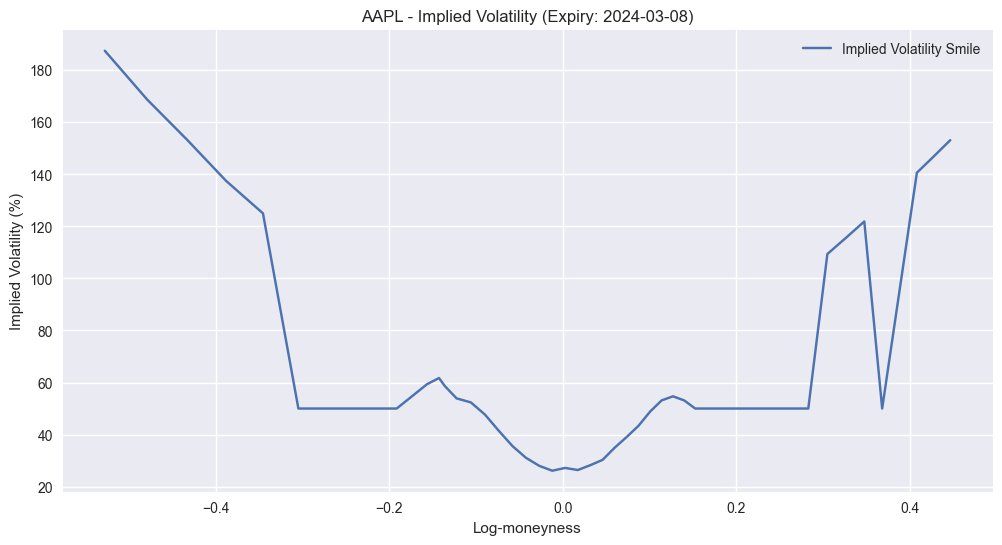

In [23]:
"""
Generate a volatility smile for the nearest available maturity
"""

# Get the implied volatility smile for the nearest maturity
volatility_smile = get_market_IV_smile(underlying, available_expiry[0])

# Display the volatility smiled
plt.plot(volatility_smile * 100)

# Set the title, and axis label
plt.title(f'{underlying} - Implied Volatility (Expiry: {maturity})')
plt.xlabel('Log-moneyness')
plt.ylabel('Implied Volatility (%)')

# Set the legend of the graph
plt.legend(['Implied Volatility Smile']);

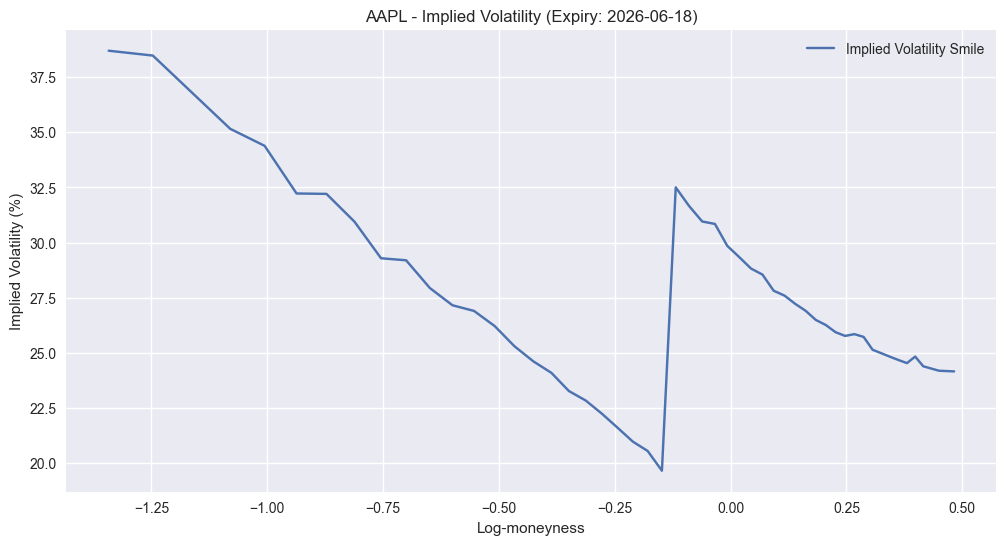

In [24]:
"""
Generate a volatility smile for the farest available maturity
"""

# Get the implied volatility smile for the farest maturity
volatility_smile = get_market_IV_smile(underlying, available_expiry[-1])

# Display the volatility smiled
plt.plot(volatility_smile * 100)

# Set the title, and axis label
plt.title(f'{underlying} - Implied Volatility (Expiry: {available_expiry[-1]})')
plt.xlabel('Log-moneyness')
plt.ylabel('Implied Volatility (%)')

# Set the legend of the graph
plt.legend(['Implied Volatility Smile']);

### 3. Implied Volatility Term Structure

In [25]:
def get_nearest_strike(
    ticker: str,
    initial_strike: float,
    maturity: str=None,
) -> float:
    """
    Find the nearest avaiblable strike
    There is not a quotation for every strike, so we ajust the possible strike

    Args:
        ticker (str):
            Ticker of the underlying

        initial_strike (float):
            Initial strike wanted

        maturity (str):
            Specify a maturity, otherwise use the nearest maturity

    Returns:
        possible_strike (float):
            Possible strike according to the availibility on the market
    """

    # Get the current options chain
    call_chain, put_chain = get_option_chain(ticker, maturity)

    # Only keep OTM option
    call_chain = call_chain.loc[call_chain['ITM'] == False]
    put_chain = put_chain[put_chain['ITM'] == False]

    # Convert the index into the DataFrame into arrays
    call_strike = call_chain.index.to_numpy()
    put_strike = put_chain.index.to_numpy()

    # Concatenate the put and call strike to have th whole strikes range
    all_strikes = np.concatenate((put_strike, call_strike))

    # Get the id of the nearest strike
    id_strike = (np.abs(all_strikes - initial_strike)).argmin()

    # Get the nearest strike thanks to its id
    possible_strike = all_strikes[id_strike]

    return possible_strike

In [26]:
def get_market_IV_term_structure(
    ticker: str, 
    strike: float=None
) -> pd.core.frame.DataFrame:
    """
    Get the market implied volatility from Yahoo Finance
    We use the OTM call and put option in order to rebuild the volatility term structure

    Args:
        ticker (str):
            Ticker of the underlying

        strike (int):
            Specify a strike, otherwise use the ATM strike

    Returns:
        volatility_term (pd.core.frame.DataFrame):
            DataFrame of the implied volatility, use the maturity as index
    """

    # Get the current underlying price
    current_price = yf.Ticker(ticker).get_info()['currentPrice']

    # Get the available maturity for the whole volatility surface
    available_expiry = get_option_maturity(ticker)

    # If the strike is unavailable, set it ATM
    if strike is None:
        strike = current_price

    # Get the available strike from the farest maturity
    real_strike = get_nearest_strike(ticker, strike, available_expiry[-1])

    # Initialize the term structure DataFrame
    term_structure = pd.DataFrame(index=available_expiry, columns=[['Implied Volatility']])

    # Get the option chain for every maturity
    for expiry in available_expiry:

        # Get the call and put option chain
        call_chain, put_chain = get_option_chain(ticker, expiry, money_style='OTM')

        # The try avoid error in the code, sometime KeyError can appears
        try:
            # If the strike is below the asset price, use the OTM put options
            if real_strike < current_price:

                    # Get the implied volatility corresponding to the strike and maturity
                    term_structure.loc[expiry] = put_chain.loc[real_strike, 'Implied Volatility']

            # If the strike is above the asset price, use the OTM put options
            elif real_strike > current_price:

                # Get the implied volatility corresponding to the strike and maturity
                term_structure.loc[expiry] = call_chain.loc[real_strike, 'Implied Volatility']

        except KeyError:
                # If an error occurs, fill the DataFrame with NaN value
                term_structure.loc[expiry] = np.nan
    
    return term_structure, real_strike

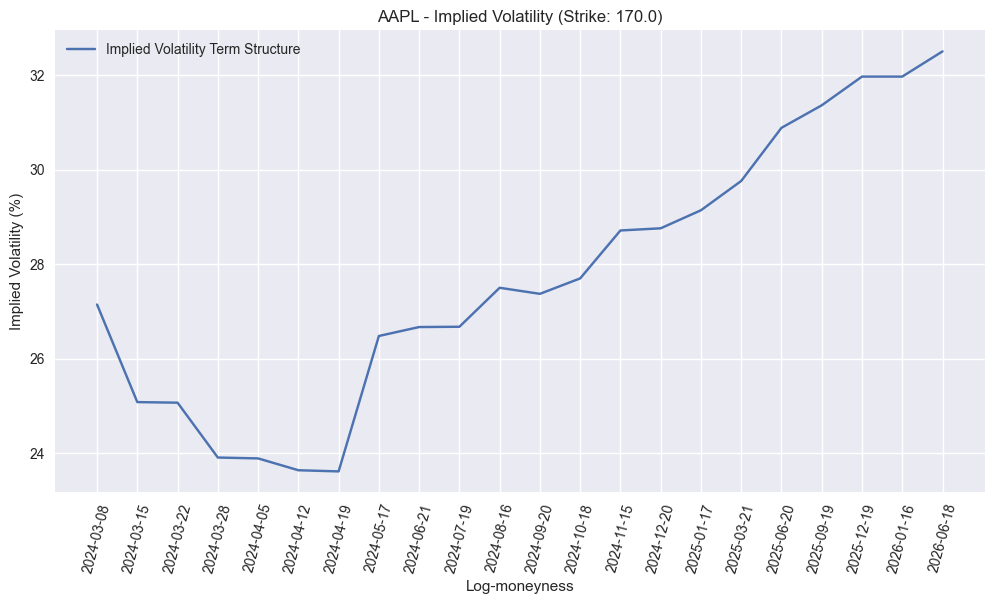

In [27]:
"""
Generate the implied volatility term-structure
"""

# Get the implied volatility term structure for the ATM strike
volatility_term_structure, strike = get_market_IV_term_structure(underlying)

# Display the term structure
plt.plot(volatility_term_structure * 100)

# Set the title, and axis label
plt.title(f'{underlying} - Implied Volatility (Strike: {strike})')
plt.xlabel('Log-moneyness')
plt.ylabel('Implied Volatility (%)')

# Rotation of the xticks to see dates
plt.xticks(rotation=75)

# Set the legend of the graph
plt.legend(['Implied Volatility Term Structure']);

### 4. Implied Volatility Surface
A **volatility surface** is a three-dimensional graphical representation that shows the relationship between option **implied volatility** (on the vertical axis), option **strike prices** (on the horizontal axis), and option **maturities** (on the perpendicular axis or in depth).

In [28]:
def get_IV_surface(ticker: str) -> pd.core.frame.DataFrame:
    """
    Get the implied volatility surface from Yahoo Finance

    Args:
        ticker (str):
            Ticker of the underlying

    Returns:
        volatility_surface (pd.core.fram.Dataframe):
            Implied Volatility Surface (row: expiries, columns: strikes)
    
    """

    # Get the available maturity for the whole volatility surface
    available_expiry = get_option_maturity(ticker)

    # Initialize the term structure DataFrame
    volatility_surface = pd.DataFrame(index=available_expiry)

    # Get the option chain for every maturity
    for expiry in available_expiry:
        
        # Get the call & put option chain
        call_chain, put_chain = get_option_chain(ticker, expiry, 'OTM')

        # Get the implied volatility of OTM option
        call_IV = call_chain[['Implied Volatility']]
        put_IV = put_chain[['Implied Volatility']]

        # Compute the volatility smile
        volatility_smile = pd.concat((put_IV, call_IV))

        # Convert the index as a list of strike
        strike = volatility_smile.index.to_list()

        # Convert the DataFrame values as Numpy array
        volatility_smile_array =  volatility_smile['Implied Volatility'].to_numpy()

        # Add the volatility smile to the whole volatility surface
        volatility_surface.loc[expiry, strike] = volatility_smile_array

    # Only keep the strike available for every maturity
    volatility_surface.dropna(axis=1, how='any', inplace=True)

    return volatility_surface

In [29]:
# Get the implied volatility surface
vol_surface = get_IV_surface(underlying)
vol_surface

105.0     130.0     135.0     140.0     145.0     150.0  \
2024-03-08  1.687502  0.500005  0.500005  0.500005  0.593754  0.539067   
2024-03-15  0.937501  0.593754  0.542973  0.500005  0.453130  0.391608   
2024-03-22  0.750003  0.503911  0.462896  0.414068  0.375006  0.323249   
2024-03-28  0.648441  0.457037  0.414068  0.373053  0.333991  0.293952   
2024-04-05  0.593754  0.427740  0.382819  0.341315  0.306648  0.274177   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.295051  0.254341  0.247261  0.239632  0.232185  0.226235   
2025-09-19  0.289253  0.251167  0.244667  0.236885  0.229439  0.222756   
2025-12-19  0.284248  0.248299  0.242500  0.234779  0.228172  0.221657   
2026-01-16  0.281440  0.246590  0.239845  0.233528  0.226814  0.220223   
2026-06-18  0.271614  0.241005  0.232765  0.228462  0.222466  0.216088   

               155.0     160.0     165.0     170.0     175.0     180.0  \
2024-03-08  0.476568  0.355475  0.279792  0.271003  0.282234  0.349616   
2024-03-15  0.330085  0.271003  0.236214  0.250496  0.241219  0.258796   
2024-03-22  0.279548  0.249763  0.224007  0.250252  0.238655  0.237801   
2024-03-28  0.259041  0.232185  0.215218  0.238777  0.234749  0.229744   
2024-04-05  0.244392  0.223396  0.206551  0.238655  0.223885  0.224983   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.217537  0.209832  0.202675  0.308784  0.301002  0.293174   
2025-09-19  0.215889  0.209282  0.201516  0.313544  0.306068  0.300575   
2025-12-19  0.216896  0.207711  0.200051  0.319617  0.310111  0.303199   
2026-01-16  0.212410  0.206276  0.200356  0.319617  0.312415  0.304481   
2026-06-18  0.208748  0.205635  0.196694  0.324958  0.316459  0.309516   

               185.0     190.0     195.0     200.0     205.0     210.0  \
2024-03-08  0.429693  0.531255  0.531255  0.500005  0.500005  0.500005   
2024-03-15  0.292976  0.333991  0.378912  0.410162  0.462896  0.492193   
2024-03-22  0.257332  0.279304  0.304694  0.334968  0.355475  0.375006   
2024-03-28  0.242195  0.260261  0.280281  0.300788  0.324226  0.349616   
2024-04-05  0.227547  0.240242  0.256843  0.277351  0.291999  0.329108   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.285255  0.277839  0.272224  0.266487  0.261390  0.257820   
2025-09-19  0.292243  0.287605  0.279457  0.275062  0.269569  0.265571   
2025-12-19  0.298774  0.290763  0.286338  0.281623  0.276649  0.272010   
2026-01-16  0.298530  0.293952  0.288612  0.282478  0.277183  0.273384   
2026-06-18  0.308418  0.298454  0.293342  0.288185  0.285453  0.278160   

               215.0     225.0  
2024-03-08  0.500005  0.500005  
2024-03-15  0.523442  0.562504  
2024-03-22  0.431646  0.484380  
2024-03-28  0.382819  0.414068  
2024-04-05  0.339850  0.394537  
...              ...       ...  
2025-06-20  0.254524  0.247627  
2025-09-19  0.261909  0.253822  
2025-12-19  0.267128  0.261360  
2026-01-16  0.269447  0.261192  
2026-06-18  0.275932  0.269066  

[22 rows x 20 columns]

In [30]:
"""
Display the volatility surface in a 3D graph
"""

# Set the values for the graph
fig = go.Figure(data=[go.Surface(x=vol_surface.columns, y=vol_surface.index, z=vol_surface.values)])

# Manage the design
fig.update_layout(title='Implied Volatility surface',
                  autosize=True,
                  scene=dict(xaxis_title='Strikes',
                             yaxis_title='Expiry Dates',
                             zaxis_title='Implied Volatility'),
                  width=1000,
                  height=500)

# Set the render default to save and display the graph
pio.renderers.default = 'iframe'

# Display the figure
fig.show()

---

## II. Stochastic Volatility Inspired

To accurately value derivative products, it is essential to employ a robust volatility surface. This entails utilizing interpolation and extrapolation techniques for both implied volatility **slices** and **multi-slice** surfaces, all while maintaining arbitrage-free conditions. 
  
Two interpolation techniques
- **Parametric Interpolation:** SABR, Heston, etc.
- **Non-Parametric Interpolation:** Cubic Spline, Shape-Preserving, Natural Smoothing Splines

The **Stochastic Volatility Inspired** model is a parametric model for stochastic implied volatility. The stochastic volatility inspired (SVI) parameterization of the implied volatility smile was initially developed at *Merrill Lynch* in *1999*. **Parameterizing** the volatility surface with a SVI like model is very useful beacause, **interpolation** and **extrapolation** methodologies are **no longer required**, it allows for arbitrage detection and we can engineer liquidity costs directlyin the model.


- It fit very well the input data in the equity market.
- Parametric model with closed formula
- Explicit formula to pass from implied volatility to surface
- SVI can guarantee an arbitrage free calibration


---

### Notation

Asset Price: $S_t$  
Forward Price: $F_t := \mathbb{E}(S_t | F_0)$ with $\mathcal{F}_t$ the natural filtration  
European Call Option Price: $C_{BS}(k, \sigma^2 t)$  
Strike: $K = F_t \exp^{k}$  
Maturity: $t$  
Volatility: $\sigma$  
Black-Scholes Implied Volatility: $\sigma_{BS}(k, t)$  

Total Implied Variance: $w(k, t) = \sigma ^2 _{BS}(k, t) \ t$   
Implied Variance = $v(k, t) = \sigma ^2 _{BS}(k, t) = \frac{w(k, t)}{t}$


---

### 1. Raw SVI Parameterization

For a given parameter set $\mathcal{X}_R = \{ a, \ b, \ \rho, \ m, \ \sigma \}$, the **raw SVI parameterization of total implied variance** reads:
$$
	w(k, \mathcal{X}_R) 
	= \sigma^2(k, \mathcal{X}_R) T 
	= a + b \bigg( \rho(k - m) +\sqrt{(k-m)^2 + \sigma^2} \bigg)
$$

where:
- $b \ge 0$
- $|\rho| < 1$
- $a + b \sigma \sqrt{1-\rho^2} \ge 0$
- $\sigma > 0$

In [31]:
def parameterization_raw_SVI(
    k: float,
    a: float,
    b: float,
    rho: float,
    m: float,
    sigma: float,
) -> float:
    """
    Use the raw SVI to calculate the implied variance

    Args:
        k (float):
            The log moneyness

        a (float):
            Parameter for vertical translation of the variance smile

        b (float):
            It increases the slopes of both the put and call wings

        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right

        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

    Returns:
        implied_variance (float):
            The implied variance given by the raw SVI model
        
    """
    
    # Calculate the total implied variance according to raw SVI model
    total_implied_variance = a + b * ( rho * (k - m) + np.sqrt( (k - m)**2 + sigma**2 ) )
    
    return total_implied_variance

#### Example of Parameterization

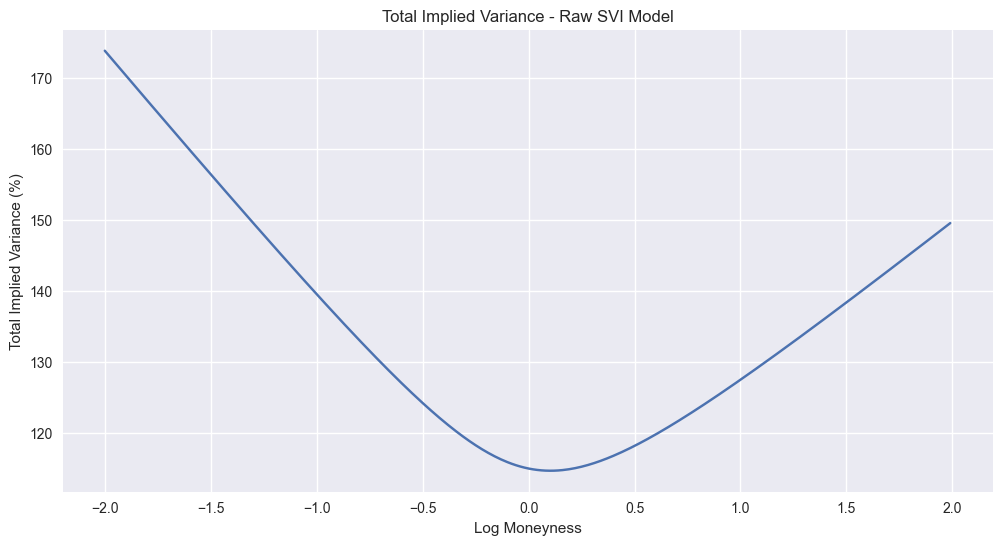

In [32]:
# Generate log-moneyness from -2 to 2
moneyness_array = np.arange(-2., 2., 0.01)

# Build a volatility smile with the Raw SVI parameterization
implied_variance = parameterization_raw_SVI(moneyness_array, 1, 0.3, -0.2, 0.001, 0.5)

# Display the simulated volatility smile
plt.plot(moneyness_array, implied_variance * 100)

# Show the legend on the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance (%)')
plt.title('Total Implied Variance - Raw SVI Model');

#### First Calibration
The initial estimation values for calibrating the SVI are arbitrary.

- $a = \frac{1}{2} \min(W_{SVI})$
- $b = 0.1$
- $\rho = -0.5$
- $m = 0.1$
- $\sigma = 0.1$

In [33]:
# Set the initial estimation values
a = 1/2 * min(implied_variance)
b = 0.1
rho = -0.5
m = 0.1
sigma = 0.1

---

#### SVI Parameter Limits
However, the parameters must fall within the range limits (upper, lower) of the SVI parameters.

The apparent limits for the raw SVI parameters are as follows:
- $10^{-5} < a \le \max(\sigma^2_{market})$ 
- $0.001 < b < 1$
- $-1 < \rho < 1$
- $2 \min k_i \le m \le 2 \max k_i$
- $0.01 \le \sigma \le 1$


---

### 2. Raw SVI Parameters Interpretation
#### $a$: Overall Level of Variance 
An increaseing of $a$ increases the general level of variance, it's equivalent to a **vertical translation of the smile**.

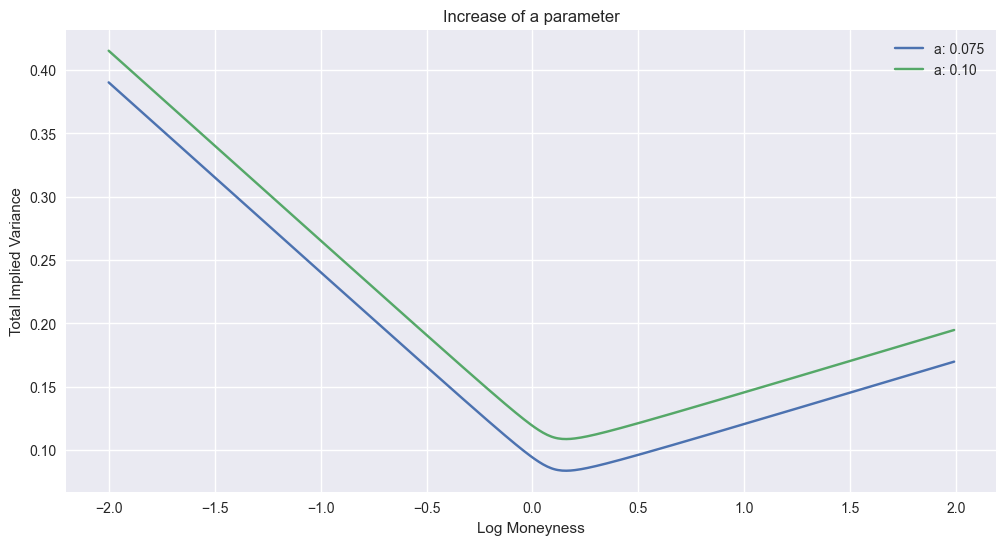

In [34]:
# Use the Raw SVI parameterization, change the a parameter
a_1 = parameterization_raw_SVI(moneyness_array, 0.075, b, rho, m, sigma)
a_2 = parameterization_raw_SVI(moneyness_array, 0.10, b, rho, m, sigma)

# Display the two volatility smiles
plt.plot(moneyness_array, a_1, label='a: 0.075')
plt.plot(moneyness_array, a_2, label='a: 0.10')

# Set the title and axis labels of the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.title('Increase of a parameter')

# Show the legend on the graph
plt.legend();

#### $b$: Vol-of-Vol
It controls the Angle Between the Left & Right Asymptotes.  
Increasing $b$ increases the slopes of both the put and call wings, **tightening the smile**.

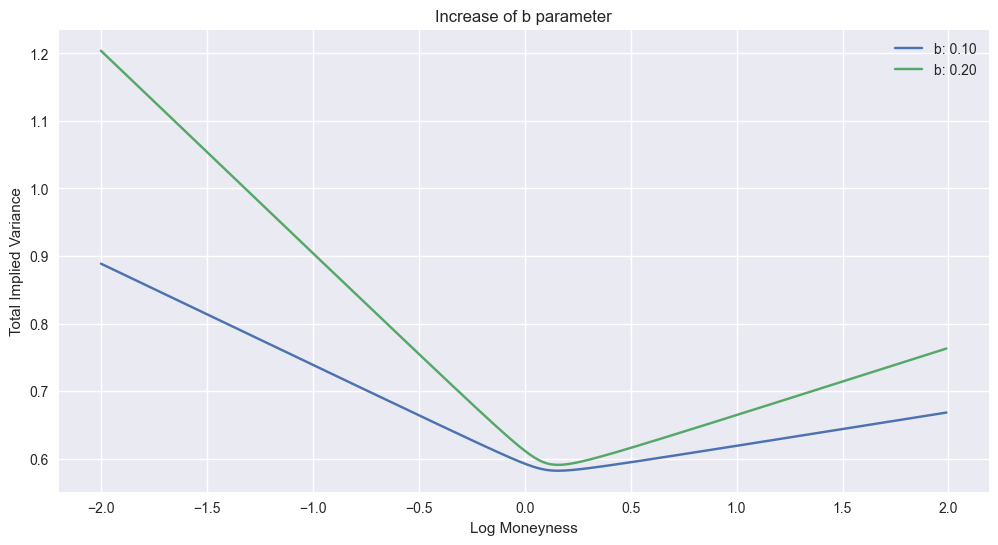

In [35]:
# Use the Raw SVI parameterization, change the b parameter
b_1 = parameterization_raw_SVI(moneyness_array, a, 0.1, rho, m, sigma)
b_2 = parameterization_raw_SVI(moneyness_array, a, 0.2, rho, m, sigma)

# Display the two volatility smiles
plt.plot(moneyness_array, b_1, label='b: 0.10')
plt.plot(moneyness_array, b_2, label='b: 0.20')

# Set the title and axis labels of the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.title('Increase of b parameter')

# Show the legend on the graph
plt.legend();

#### $\rho$: Skew
It determines the Orientation of the Smile.  
Increasing $\rho$ decreases the slope of the left wing, and increases the slope of the right wing a **counter-clockwise rotation of the smile**.

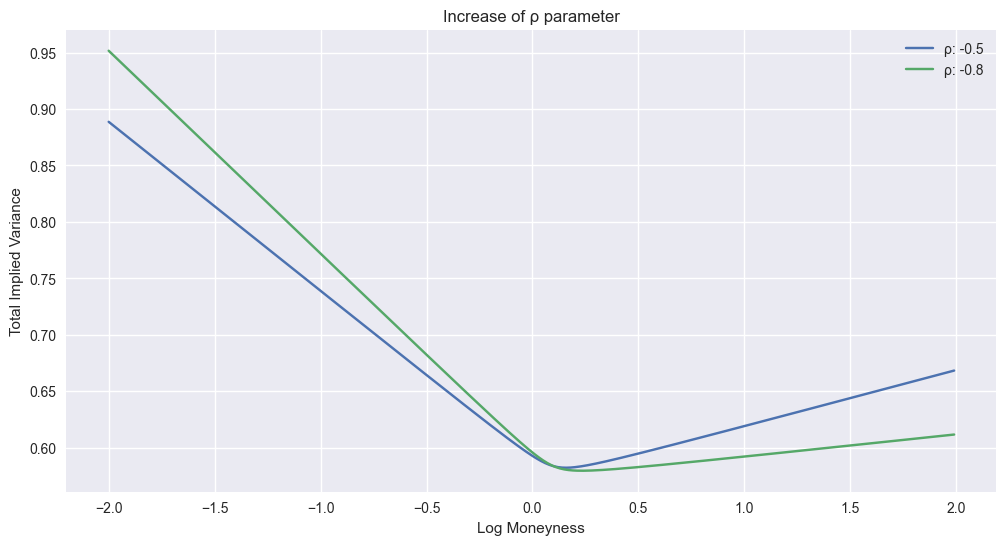

In [36]:
# Use the Raw SVI parameterization, change the ρ parameter
rho_1 = parameterization_raw_SVI(moneyness_array, a, b, -0.5, m, sigma)
rho_2 = parameterization_raw_SVI(moneyness_array, a, b, -0.8, m, sigma)

# Display the two volatility smiles
plt.plot(moneyness_array, rho_1, label='ρ: -0.5')
plt.plot(moneyness_array, rho_2, label='ρ: -0.8')

# Set the title and axis labels of the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.title('Increase of ρ parameter')

# Show the legend on the graph
plt.legend();

#### $m$: Horizontal Translation
Increasing $m$ **translates the smile to the right**.

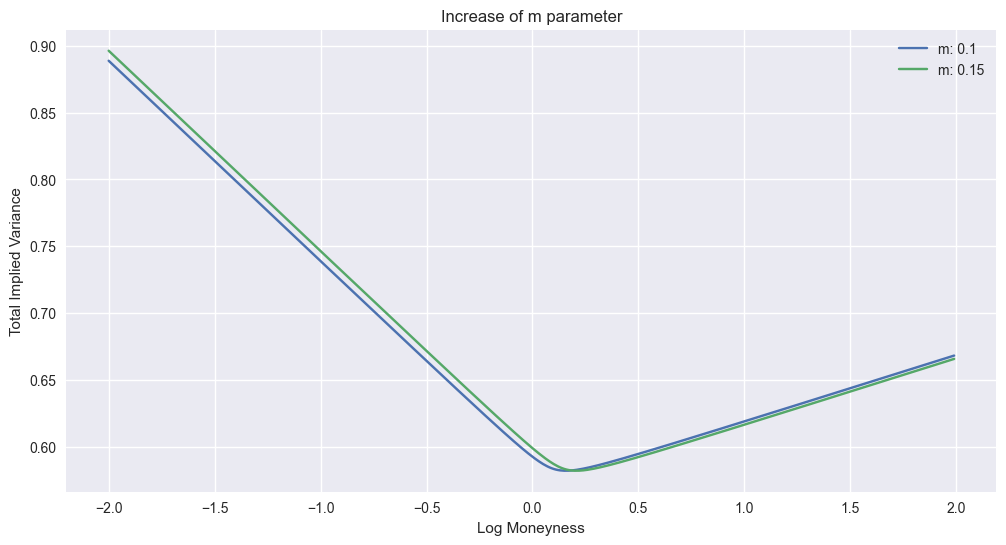

In [37]:
# Use the Raw SVI parameterization, change the m parameter
m_1 = parameterization_raw_SVI(moneyness_array, a, b, rho, 0.1, sigma)
m_2 = parameterization_raw_SVI(moneyness_array, a, b, rho, 0.15, sigma)

# Display the two volatility smiles
plt.plot(moneyness_array, m_1, label='m: 0.1')
plt.plot(moneyness_array, m_2, label='m: 0.15')

# Set the title and axis labels of the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.title('Increase of m parameter')

# Show the legend on the graph
plt.legend();

#### $\sigma$: Determines How Smooth the Vertex is
Increasing $\sigma$ reduces the ATM **curvature of the smile**.

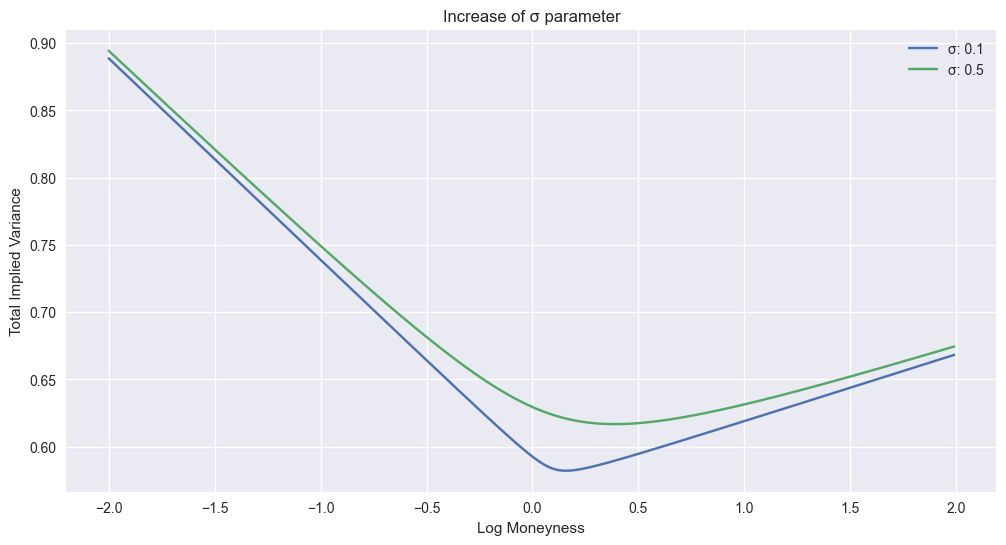

In [38]:
# Use the Raw SVI parameterization, change the σ parameter
sigma_1 = parameterization_raw_SVI(moneyness_array, a, b, rho, m, 0.1)
sigma_2 = parameterization_raw_SVI(moneyness_array, a, b, rho, m, 0.5)

# Display the two volatility smiles
plt.plot(moneyness_array, sigma_1, label='σ: 0.1')
plt.plot(moneyness_array, sigma_2, label='σ: 0.5')

# Set the title and axis labels of the graph
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.title('Increase of σ parameter')

# Show the legend on the graph
plt.legend();

---

### 3. Raw SVI Calibration
We will make some optimisation and compare the efficiency of our model.

#### 3.1. Least Square Objective Function
The least-squares objective function to optimize is $f(k, \mathcal{X}_R)$, where $\mathcal{X}_R = \{ a, \ b, \ \rho, \ m, \ \sigma \}$ is the set of parameters model, for an expiry time fix $T$.

$$
	f(k, \mathcal{X}_R) =
	\sum ^{n} _{i=1} 
	{(
		w _{SVI_i} ^{Model} - w _{Total_i} ^{Market}
	)^2}
$$

$$
	f(k_i, \mathcal{X}_R) =
	\sum ^{n} _{i=1} 
	{\bigg[
		a + b
		\bigg(
			\rho (k_i-m) + \sqrt{(k_i-m)^2 + \sigma^2}
		\bigg)
		- w _{Total_i} ^{Market}
	\bigg]^2}
$$

In [39]:
def optimization_raw_SVI(
    params: list[float],
    k: np.ndarray,
    initial_variance: np.ndarray,
    weight_array: np.ndarray=None,
) -> float:
    """
    Least Square Objective Function
    Function for the optimization, the aim is to reduce the spread between the simulated variance and the initial variance

    Args:
        params (list[float]):
            List of the SVI parameters (a, b, ρ, m, σ)

        k (np.ndarray):
            Log-moneyness of the serie

        initial_variance (np.ndarray):
            Initial variance as benchmark

        weight_array (np.ndarray):
            Possible weight to better calibration

    Returns:
        objective_function (float):
            The least-squares objective function result
    """

    # Unpack the variables
    a, b, rho, m, sigma = params

    # Simulate the variance smile with the raw SVI model
    variance_svi = parameterization_raw_SVI(k, a, b, rho, m, sigma)

    if weight_array is None:
        weight_array = np.ones_like(variance_svi)

    # Calculate the sum of the squared errors 
    objective_function = np.sum( weight_array * (variance_svi - initial_variance)**2 )
    
    return objective_function

In [40]:
def get_raw_SVI_parameter(
    initial_variance: np.ndarray,
    k: np.ndarray,
    weight_array: np.ndarray=None,
) -> list[float]:
    """
    Retrieve the raw SVI parameters that best match the provided total implied variance while applying a set of constraints to prevent certain errors.
    
    Args:
        initial_variance (np.ndarray):
            Initial variance as benchmark

        k (np.ndarray):
            Log-moneyness of the serie

        weight_array (np.ndarray):
            Possible weight to better calibration

    Returns:
        params (list[float]):
            List of the SVI parameters (a, b, ρ, m, σ)
    """

    # Set the optimial first parameters value
    a = 1/2 * min(initial_variance)
    b = 0.1
    rho = -0.5
    m = 0.1
    sigma = 0.1

    # Pack the variables into a list, it's the parameter to optimize
    params = (a, b, rho, m, sigma)

    # Check if the weight array is given or not
    if weight_array is None:
        # Set the additional parameters, these parameters are not changed
        additional_params = (k, initial_variance)

    else:
        # Set the additional parameters, these parameters are not changed
        additional_params = (k, initial_variance, weight_array)

    # Set the limits of the variables, the parameters boundaries
    bounds = ((0.00001, max(initial_variance)), (0.001, 0.999999), (-0.999999, 0.999999), (2*min(k), 2*max(k)), (0.01, 1.))

    # Minimize the objective function, find the least squares errors
    optimization = minimize(optimization_raw_SVI, x0=params, args=additional_params, bounds=bounds, method='SLSQP')

    # Check if the optimization was a success
    if optimization.success == True:
        
        # Return the optimal parameters 
        return optimization.x
        
    else:
        # Error message when the optimization is impossible
        print("Optimization failed")

        # Return the initial parameters
        return params

#### 3.2. Perfect Calibration
We start to simulate a variance smile with parameters into the bounds. The optimization function must be almost perfect. 

In [41]:
# Set a log-moneyness from -2 to 2
moneyness_array = np.arange(-2., 2., 0.01)

In [42]:
# General level of variance
a = 1

# Slopes of both the call and put wings
b = 0.3

# Counter-clockwise rotation
rho = -0.2

# Horizontal translation
m = 0.001

# ATM curvature of the smile
sigma = 0.5

In [43]:
"""
Perfect Calibration
"""

# Simulate the initial variance smile 
initial_implied_variance = parameterization_raw_SVI(moneyness_array, a, b, rho, m, sigma)

# Try to calibrate our model with the optimization function
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(initial_implied_variance, moneyness_array)

# Simulated the variance with the parameters obtain thanks to the optimization function
simulated_implied_variance = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

In [44]:
# Show the simulated parameter values
print('The optimization function found the following parameters')
print('a: ', a_sim)
print('b: ', b_sim)
print('ρ: ', rho_sim)
print('m: ', m_sim)
print('σ: ', sigma_sim)

The optimization function found the following parameters
a:  1.000042412985395
b:  0.29999534943151746
ρ:  -0.20002158043682602
m:  0.000987966034122979
σ:  0.49984551704265057


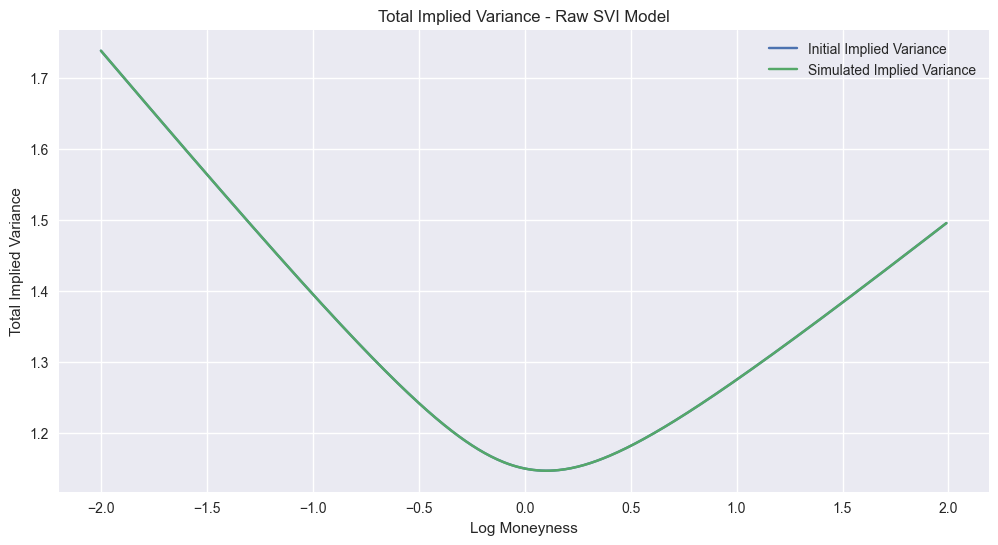

In [45]:
"""
Display the Variance Smile
"""

# Display the initial variance smile
plt.plot(moneyness_array, initial_implied_variance, label='Initial Implied Variance')

# Display the simulated variance smie
plt.plot(moneyness_array, simulated_implied_variance, label='Simulated Implied Variance');

# Set the graph's title, axis label, and legend
plt.title('Total Implied Variance - Raw SVI Model')
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.legend();

With our model, we obtained a very well parameters approximation. We are near to a perfect calibration.

---

#### 3.3. Axel Vogt Calibration
The Axel Vogt example is a very well known case study in the SVI literacy. It's a volatility smile simulated with parameters outside the limits, therefore we try to estimate the coefficients which give the best fit and with respect to the boundaries conditions.

The Axel Vogt parameters are:  
$a = -0.040998372001772$  
$b = 0.13308181151379$  
$m = 0.35858898335748$  
$\rho = 0.30602086142471$  
$\sigma = 0.41531878803777$

In [46]:
# General level of variance
a=-0.040998372001772

# Slopes of both the call and put wings
b=0.13308181151379

# Counter-clockwise rotation
rho = 0.30602086142471

# Horizontal translation
m = 0.35858898335748

# ATM curvature of the smile
sigma = 0.4153

In [47]:
# Simulate the initial variance smile 
initial_implied_variance = parameterization_raw_SVI(moneyness_array, a, b, rho, m, sigma)

# Try to calibrate our model with the optimization function
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(initial_implied_variance, moneyness_array)

# Simulated the variance with the parameters obtain thanks to the optimization function
simulated_implied_variance = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



In [48]:
# Show the simulated parameter values
print('The optimization function found the following parameters')
print('a: ', a_sim)
print('b: ', b_sim)
print('ρ: ', rho_sim)
print('m: ', m_sim)
print('σ: ', sigma_sim)

The optimization function found the following parameters
a:  1e-05
b:  0.10864438737983143
ρ:  0.3321313371034935
m:  0.3417953603643362
σ:  0.041892599239890915


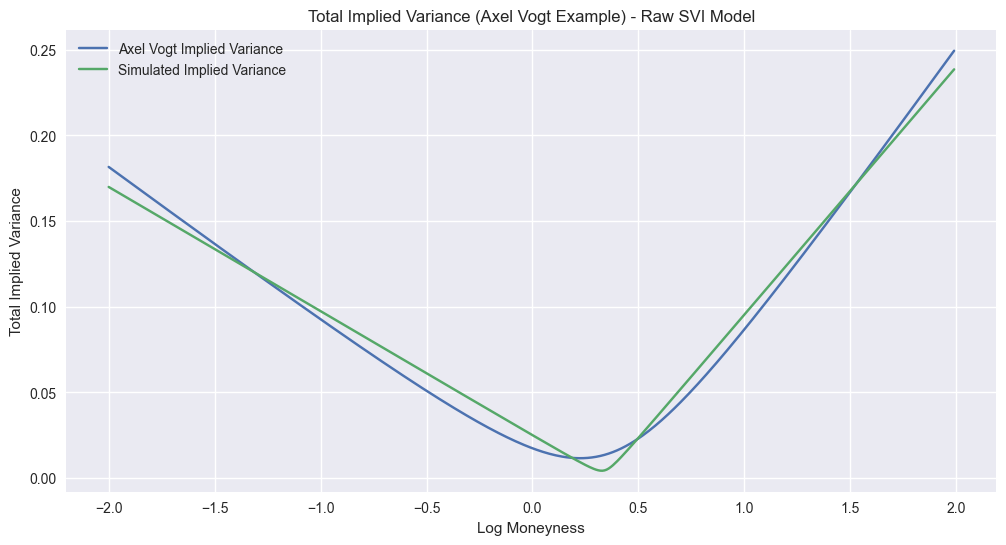

In [49]:
"""
Display the Variance Smile
"""

# Display the initial variance smile
plt.plot(moneyness_array, initial_implied_variance, label='Axel Vogt Implied Variance')

# Display the simulated variance smie
plt.plot(moneyness_array, simulated_implied_variance, label='Simulated Implied Variance');

# Set the graph's title, axis label, and legend
plt.title('Total Implied Variance (Axel Vogt Example) - Raw SVI Model')
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.legend();

We found parameters to fit with the initial variance smile from Axel Vogt. However, due to impossible initial parameters, we are not able to perfectly fit with the initial variance smile. 

---

#### 3.4. Market Calibration
In this case, we will take the volatility smile found on Yahoo Finance, and we will try to fit our model.

In [50]:
# Get the last maturity
maturity = available_expiry[0]

# Get the implied volatility smile for the nearest maturity
volatility_smile = get_market_IV_smile(underlying, maturity)

# Get the log-moneyness
moneyness_array = volatility_smile.index.to_numpy()

dte = convert_date_to_DTE(maturity)

# Convert the volatility as variance
market_implied_variance = volatility_smile['Implied Volatility'].to_numpy() ** 2 * dte

In [51]:
# Try to calibrate our model with the optimization function
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(market_implied_variance, moneyness_array)

# Simulated the variance with the parameters obtain thanks to the optimization function
simulated_implied_variance = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



In [52]:
# Show the simulated parameter values
print('The optimization function found the following parameters')
print('a: ', a_sim)
print('b: ', b_sim)
print('ρ: ', rho_sim)
print('m: ', m_sim)
print('σ: ', sigma_sim)

The optimization function found the following parameters
a:  1e-05
b:  0.03255849048898896
ρ:  -0.4696550254299085
m:  -0.08889823471523271
σ:  0.01


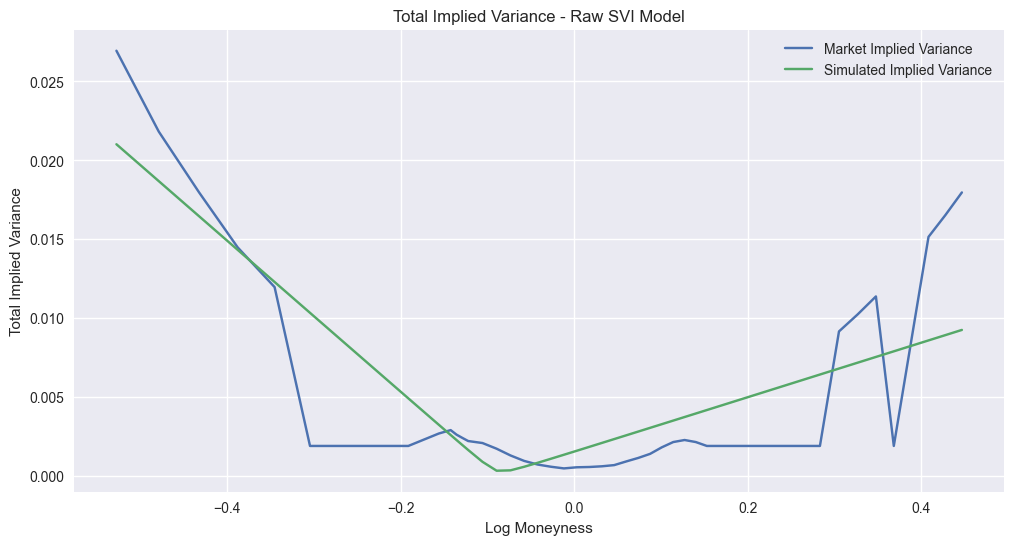

In [53]:
# Display the initial variance smile
plt.plot(moneyness_array, market_implied_variance, label='Market Implied Variance')

# Display the simulated variance smile
plt.plot(moneyness_array, simulated_implied_variance, label='Simulated Implied Variance');

# Set the graph's title, axis label, and legend
plt.title('Total Implied Variance - Raw SVI Model')
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.legend();

---


### 4. Raw SVI Calibration Improvement
The optimization of the least-squares objective function can be enhanced by **incorporating weights**, giving more significance to the most crucial strikes. In practice, the very important and liquid area is the ATM (At-The-Money) zone; therefore, it is crucial to assign more weight to this area compared to the wings. In our scenario, we will assign weights **based on the volume of the strikes**, aiming to account for **market liquidity** and achieve an optimal optimization result.  


$$
	f(k, \mathcal{X}_R) =
	\sum ^{n} _{i=1} weight_i
	{(
		w _{SVI_i} ^{Model} - w _{Total_i} ^{Market}
	)^2}
$$

In [54]:
def get_market_volume(
    ticker: str, 
    maturity: str=None
) -> pd.core.frame.DataFrame:
    """
    Get the market implied volatility from Yahoo Finance
    We use the OTM call and put option in order to rebuild the volatility smile

    Args:
        ticker (str):
            Ticker of the underlying

        maturity (str):
            Specify a maturity, otherwise use the nearest maturity

    Returns:
        volatility_smile (pd.core.frame.DataFrame):
            DataFrame of the implied volatility, use the log-moneyness as index
    """

    # Get the current price of the underlying
    current_price = yf.Ticker(ticker).get_info()['currentPrice']

    if maturity is None:
        maturity = get_option_maturity(ticker)[0]

    # Get the call & put option chain
    call_chain, put_chain = get_option_chain(ticker, maturity, 'OTM')

    # Get the implied volatility of OTM option
    call_volume = call_chain[['Volume']]
    put_volume = put_chain[['Volume']]

    # Compute the volatility smile
    volume_slice = pd.concat((put_volume, call_volume))

    # Ordered the strike
    volume_slice.sort_index(ascending=True, inplace=True)

    # Get the delta date as DTE format
    dte = convert_date_to_DTE(maturity)

    # Get the risk-free rate (SOFR)
    risk_free_rate = get_SOFR()

    # Adjust the index as log-moneyness
    volume_slice.index = np.log(volume_slice.index / current_price*np.exp(dte * risk_free_rate))

    # Rename the index columns
    volume_slice.index.name = 'Log-Moneyness'

    # Fill the unvailable data with 0
    volume_slice.fillna(0, inplace=True)

    return volume_slice

In [55]:
# Get the volume for every strike of the closest maturity
volume_df = get_market_volume('AAPL')
volume_df

Volume
Log-Moneyness        
-0.527084         3.0
-0.478294       104.0
-0.431774         1.0
-0.387322         1.0
-0.344763         1.0
...               ...
 0.348385         1.0
 0.369004       500.0
 0.409009         1.0
 0.428427         2.0
 0.447476        32.0

[49 rows x 1 columns]

In [56]:
def convert_volume_to_weight(volume_df: pd.core.frame.DataFrame) -> np.ndarray:
    """
    Convert a DataFrame volume as array of percentage
    Can change the volume in contract as weight

    Args:
        volume_df (pd.core.frame.DataFrame):
            Volume in contract

    Returns:
        weight_array (np.ndarray):
            Vector of percentage / weight
    """

    # Convert volume contract as percentage volume
    weight_df = volume_df / volume_df.sum()

    # Convert the DataFrame as numpy array
    weight_array = weight_df.iloc[:,0].to_numpy()
    
    return weight_array

In [57]:
# Convert the volume DataFrame as weight
volume_weight = convert_volume_to_weight(volume_df)
volume_weight

array([1.59775037e-05, 5.53886794e-04, 5.32583456e-06, 5.32583456e-06,
       5.32583456e-06, 2.66291728e-04, 3.19550073e-04, 1.15038026e-03,
       6.12470974e-04, 1.91730044e-04, 2.66291728e-05, 1.81078375e-04,
       1.35276198e-03, 6.55077651e-04, 1.59775037e-04, 1.37406532e-03,
       2.78541147e-03, 1.13706568e-02, 2.18572250e-02, 6.26105111e-02,
       1.26169021e-01, 1.72226838e-01, 1.87448073e-01, 1.34674378e-01,
       6.02937730e-02, 4.99083956e-02, 2.99951002e-02, 4.25267889e-02,
       2.99524936e-02, 4.79484885e-02, 6.66261903e-03, 2.72682729e-03,
       1.06516691e-04, 1.11842526e-04, 5.91167636e-04, 5.32583456e-06,
       2.13033382e-05, 5.32583456e-06, 1.17168360e-04, 1.06516691e-04,
       2.66291728e-05, 5.32583456e-06, 1.06516691e-05, 5.32583456e-06,
       5.32583456e-06, 2.66291728e-03, 5.32583456e-06, 1.06516691e-05,
       1.70426706e-04])

### Market Calibration (with Volume)

In [58]:
# Try to calibrate our model with the optimization function
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(market_implied_variance, moneyness_array, volume_weight)

# Simulated the variance with the parameters obtain thanks to the optimization function
simulated_implied_variance_volume = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

In [59]:
# Show the simulated parameter values
print('The optimization function found the following parameters')
print('a: ', a_sim)
print('b: ', b_sim)
print('ρ: ', rho_sim)
print('m: ', m_sim)
print('σ: ', sigma_sim)

The optimization function found the following parameters
a:  1.0000000000000124e-05
b:  0.014474303587553024
ρ:  -0.4962648262137823
m:  0.051611831767400966
σ:  0.06708681722824239


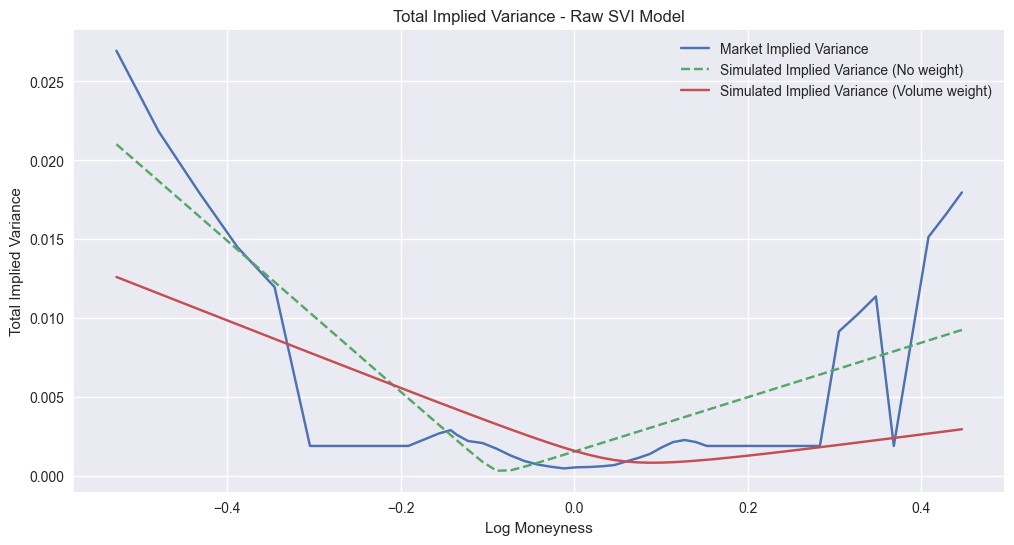

In [60]:
# Display the initial variance smile
plt.plot(moneyness_array, market_implied_variance, label='Market Implied Variance')

# Display the simulated variance smile
plt.plot(moneyness_array, simulated_implied_variance, ls='--', label='Simulated Implied Variance (No weight)')

# Display the simulated variance smile
plt.plot(moneyness_array, simulated_implied_variance_volume, label='Simulated Implied Variance (Volume weight)')

# Set the graph's title, axis label, and legend
plt.title('Total Implied Variance - Raw SVI Model')
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance')
plt.legend();

---

## III. Other SVI Parameterizations

### 1. Natural SVI Parameterization
The **Natural parameterization** is the functional form that arises as the limit of the **Heston model**. Expressions for $\omega$ and $\eta$ in terms of the Heston parameters may be unaesthetic, while $\rho$ represents the correlation between the Brownian motions driving the underlying price process and the variance process, and $\Delta$ and $\mu$ denote vertical and horizontal shifts, respectively. Despite its theoretical significance, the Natural parameterization may not be as practical for implementation as the **Raw and JW parameterizations**.
  
For a given set of parameters $\mathcal{X}_N = \{ \Delta, \ \mu, \ \rho, \ \omega, \ \eta \}$, the **natural SVI parameterization** of the total implied variance is as follows:
$$
	w(k, \mathcal{X}_N) = \Delta + \frac{\omega}{2} 
	\bigg(
		1 + \eta \rho (k-\mu) + \sqrt{(\eta (k - \mu) + \rho)^2 + (1-\rho^2)}
	\bigg)
$$

where:
- $\omega \ge 0$
- $|\rho| < 1$
- $\eta > 0$

In [61]:
def parameterization_natural_SVI(
    k: float,
    delta: float,
    mu: float,
    rho: float,
    omega: float,
    eta: float,
) -> float:
    """
    Use the raw SVI to calculate the implied variance

    Args:
        k (float):
            The log moneyness

        delta (float):
            Parameter for vertical translation of the variance smile

        mu (float):
            Parameter for horizontal translation of the variance smile

        rho (float):
            Correlation between the Brownian motions driving the underlying price process and the variance process
        
        omega (float):
            Long-time mean value of the variance

        eta (float):
            Volatility of the variance process

    Returns:
        implied_variance (float):
            The implied variance given by the raw SVI model
        
    """
    
    # Calculate the total implied variance according to raw SVI model
    total_implied_variance = delta + omega/2 * (1 + eta * rho * (k - mu) + np.sqrt((eta * (k - mu) + rho)**2 + (1-rho**2)))
    
    return total_implied_variance

#### 1.1. Heston Model
In finance, the **Heston model**, named after Steven L. Heston, is a mathematical model that describes the evolution of the volatility of an underlying asset. It is a **Stochastic Volatility Model**: such a model assumes that the volatility of the asset is not constant, nor even deterministic, but follows a random process.

The basic Heston model assumes that $S_t$, the price of the asset, is determined by a stochastic process:
$$
    dS_t = \mu S_t dt + \sqrt{\nu_t} S_t dW_t^S
$$
  
where the volatility $\sqrt{\nu_t}$ follows an **Ornstein-Uhlenbeck** process:
$$
    d\nu_t = \theta (\omega - \nu_t)dt + \eta \sqrt{\nu_t} dW _t ^{\nu}
$$


- $\nu_0$: the initial variance  
- $\omega$: is a long-time mean value of the variance  
- $\theta$: is the rate at which the variance reverts towards $\omega$  
- $\rho$: the correlation of the two Wiener processes
- $\eta$: the volatility of the variance process

In [62]:
def get_MC_vol_heston(
    initial_variance: float,
    theta: float,
    omega: float,
    eta: float,
    time: float=1.0,
    nb_step: int=1000,
    nb_simulation: int=1000,
) -> np.ndarray:
    """
    Generate Monte-Carlo simulation with CIR process: price the variance

    Args:
        initial_variance (float):
            The initial variance value

        theta (float):
            Rate at which the variance reverts towards the long-term mean

        omega (float):
            Long-time mean value of the variance

        eta (float):
            Volatility of the variance process

        time (float):
            Time for simulation, express in year (1.0 = 1y)

        nb_step (int):
            Number of step in the simulation

        nb_simulation (int):
            Number of path to simulate

    Returns:
        stochastic_variance (np.ndarray):
            Monte-Carlo Simulation of Stochastic Variance
    """

    # Generate random variable for the brownian motion
    brownian_motion = np.random.normal(size=(nb_step, nb_simulation))
    
    # Initialize the variance process
    stochastic_variance = np.full_like(brownian_motion, initial_variance)
    
    # Get the time delta step
    dtime = time / nb_step

    # Generate the the Monte-Carlo simulation
    for i in range(1, nb_step):
        
        # Add the variance change to the previous variance
        stochastic_variance[i] = np.maximum(stochastic_variance[i-1] + theta * (omega - stochastic_variance[i-1]) * dtime + eta * np.sqrt(stochastic_variance[i-1] * dtime) * brownian_motion[i, :], 0.0)

    return stochastic_variance

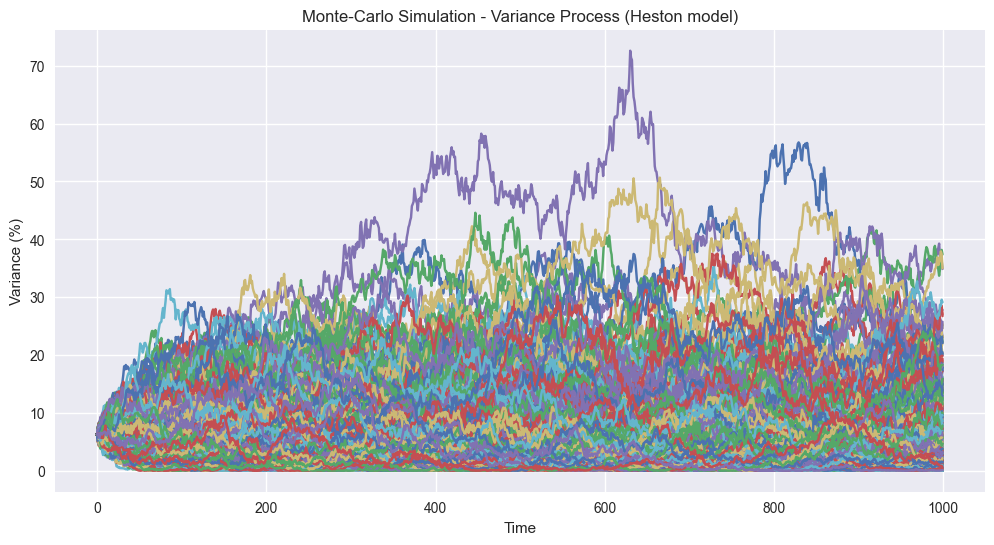

In [63]:
# Initialize parameters
init_variance = 0.25**2
mean_reversion_speed = 3.0
long_term_mean = 0.20**2
vol_of_var = 0.6

# Generate the Monte-Carlo simulations of the variance
stochastic_variance = get_MC_vol_heston(init_variance, mean_reversion_speed, long_term_mean, vol_of_var)

# Display a graph with the simulations
plt.plot(stochastic_variance * 100)

# Set the title and axis labels of the graphs
plt.title('Monte-Carlo Simulation - Variance Process (Heston model)')
plt.xlabel('Time')
plt.ylabel('Variance (%)');

#### 1.2. Raw SVI & Natural SVI Equivalences
We have the following correspondence of parameters between the **Raw SVI** and the **Natural SVI**:

- $a = \Delta + \frac{\omega}{2}(1-\rho^2)$
- $b = \frac{\omega \eta}{2}$
- $\rho = \rho$
- $m = \mu - \frac{\rho}{\eta}$
- $\sigma = \frac{\sqrt{1-\rho^2}}{\eta}$
  
  
And its inverse transformation, between the **Natural SVI** and the **Raw SVI**:

- $\Delta = a - \frac{\omega}{2}(1-\rho^2)$
- $\mu = m + \frac{\rho \sigma}{\sqrt{1-\rho^2}}$
- $\rho = \rho$
- $\omega = \frac{2b \sigma}{\sqrt{1-\rho^2}}$
- $\eta = \frac{\sqrt{1 - \rho^2}}{\sigma}$

In [64]:
# General level of variance
a = 1

# Slopes of both the call and put wings
b = 0.3

# Counter-clockwise rotation
rho = -0.2

# Horizontal translation
m = 0.001

# ATM curvature of the smile
sigma = 0.5

# Set a log-moneyness from -2 to 2
moneyness_array = np.arange(-2., 2., 0.01)

In [65]:
def from_raw_to_natural(a, b, rho, m, sigma):
    """
    Get the Natural SVI parameters from the Raw SVI parameters

    Args:
        a (float):
            Parameter for vertical translation of the variance smile

        b (float):
            It increases the slopes of both the put and call wings

        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right

        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

    Returns:
        delta (float):
            Parameter for vertical translation of the variance smile

        mu (float):
            Parameter for horizontal translation of the variance smile

        rho (float):
            Correlation between the Brownian motions driving the underlying price process and the variance process
        
        omega (float):
            Long-time mean value of the variance

        eta (float):
            Volatility of the variance process
    """

    # Calculate the omega value from Raw parameters
    omega = (2 * b * sigma) / np.sqrt(1 - rho**2)

    # Calculate the delta value from Raw parameters
    delta = a - omega/2 * (1 - rho**2)

    # Calculate the mu value from Raw parameters
    mu = m + (rho * sigma) / np.sqrt(1 - rho**2)

    # Calculate the eta value from Raw parameters
    eta = np.sqrt(1 - rho**2) / sigma
    
    return delta, mu, rho, omega, eta

In [66]:
# Convert the Raw SVI parameters to Natural SVI parameters
delta, mu, rho, omega, eta = from_raw_to_natural(a, b, rho, m, sigma)

# Display the Natural SVI parameter values
print('Δ: ', delta)
print('μ: ', mu)
print('ρ: ', rho)
print('ω: ', omega)
print('η: ', eta)

Δ:  0.8530306154330093
μ:  -0.10106207261596577
ρ:  -0.2
ω:  0.3061862178478973
η:  1.9595917942265424


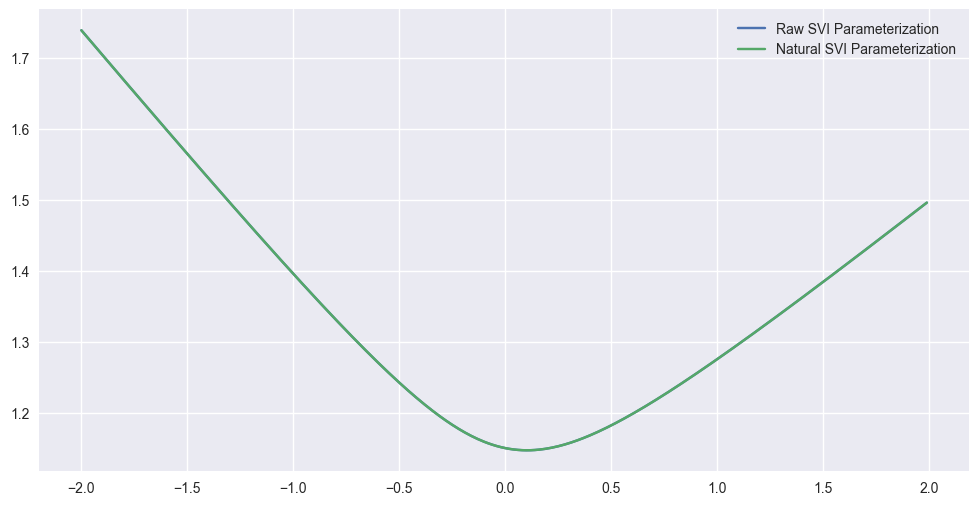

In [67]:
# Generate total implied variance with the Raw SVI parameterization
sim_raw_svi = parameterization_raw_SVI(moneyness_array, a, b, rho, m, sigma)

# Generate total implied variance with the Natural SVI parameterization
sim_natural_svi = parameterization_natural_SVI(moneyness_array, delta, mu, rho, omega, eta)

# Display the Raw and Natural SVI with the same equivalent parameters
plt.plot(moneyness_array, sim_raw_svi, label='Raw SVI Parameterization')
plt.plot(moneyness_array, sim_natural_svi, label='Natural SVI Parameterization')

# Set the legend
plt.legend();

We achieved an almost perfect calibration!  
However, the main limitation is that we cannot obtain the speed of mean reversion, $\theta$, using this method.

---

### 2. Jump-Wing SVI Parameterization
The **Jump-Wing SVI** allows the parameters to be
aremore tractable for traders than the two previous parameterization. More importantlyyfor the aim of this thesis, there is literature on how to find conditions on them to preventnstatic arbitrage in the implied volatility surface.  

  
- Neither the **raw SVI parameterization** nor the **natural SVI parameterization** is intuitive for traders.
- There is no reason to expect these parameters to be particularly stable.
- The **SVI-Jump-Wings (SVI-JW)** parameterization of the **implied variance** $v_t$ (**rather than the total implied variance $w$**) was inspired by a similar parameterization attributed to Tim Klassen, then at Goldman Sachs.

  
The **at-the-money implied variance**.  
$v_t = \frac{a + b (-\rho m + \sqrt{m^2 + \sigma^2})}{t}$

The **at-the-money implied volatility skew**  
$\psi_t = \frac{1}{\sqrt{w_t}} \frac{b}{2} \bigg( - \frac{m}{\sqrt{m^2 + \sigma^2}} + \rho \bigg)$

The **slope of the left wing**, the part of the smile corresponding to **out-the-money Put options**, scaled with the at-the-money total implied volatility  
$p_t = \frac{1}{\sqrt{w_t}} b (1-\rho)$

The **slope of the right wing**, the part of the smile corresponding to **out-the-money Call options**, scaled with the at-the-money total implied volatility  
$c_t = \frac{1}{\sqrt{w_t}} b (1 + \rho)$

The **minimum level implied variance**  
$\tilde{v}_t = \frac{a + b \sigma \sqrt{1-\rho^2}}{t}$


Note that $w_t = v_t t$, this parameterization depends explicitly on the time to maturity, $t$.

In [68]:
def from_raw_to_jw(a, b, rho, m, sigma, time=1.0):
    """
    Get the Natural SVI parameters from the Raw SVI parameters

    Args:
        a (float):
            Parameter for vertical translation of the variance smile

        b (float):
            It increases the slopes of both the put and call wings

        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right

        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

         time (float):
             Time to maturity

    Returns:
        v (float):
            ATM implied variance
        
        psi (float):
            ATM skew
        
        p (float):
            Slope of the left wing: OTM put
        
        c (float):
            Slope of the right wing: OTM call
        
        v_hat (float):
            Minimum level of the implied variance
    """

    # Calculat the total implied variance
    w = a + b * (-rho*m + np.sqrt(m**2 + sigma**2))

    # Calculat the ATM implied variance
    v = w / time

    # Calculate the ATM skew
    psi = 1/np.sqrt(w) * b/2 * (rho - m/np.sqrt(m**2 + sigma**2))

    # Calculate the slope of the left wing: OTM put
    p = 1/np.sqrt(w) * b * (1-rho)

    # Calculate the slope of the right wing: OTM call
    c = 1/np.sqrt(w) * b * (1+rho)

    # Calculate the minimum level of the implied variance
    v_hat = 1/time * (a + b * sigma * np.sqrt(1 - rho**2))

    return v, psi, p, c, v_hat

In [69]:
"""
Axel Vogt Parameters
"""

# General level of variance
a=-0.040998372001772

# Slopes of both the call and put wings
b=0.13308181151379

# Counter-clockwise rotation
rho = 0.30602086142471

# Horizontal translation
m = 0.35858898335748

# ATM curvature of the smile
sigma = 0.4153

In [70]:
# Convert the Raw SVI parameters to Jump-Wing SVI parameters
v, psi, p, c, v_hat = from_raw_to_jw(a, b, rho, m, sigma)

# Display the Jump-Wing SVI parameter values
print('v_t: ', v)
print('ψ_t: ', psi)
print('p_t: ', p)
print('c_t: ', c)
print('^v_t: ', v_hat)

v_t:  0.017418391363139447
ψ_t:  -0.17521040851018033
p_t:  0.6997793091516022
c_t:  1.316936382297624
^v_t:  0.011618969289113837


We derived the SVI-JW parameters from the Axel Vogt example.  
We could cross-reference these results with the research papers to validate the effectiveness of our algorithm.

---


#### 2.1. Jump-Wing SVI Parameterization Characteristic
If the smiles were perfectly scaled by $\frac{1}{\sqrt{w_t}}$, the **SVI-JW parameters would be constant**, independent of the slice $t$. 
This makes it easier to extrapolate the SVI surface to maturities beyond the longest maturity in the dataset.

$$
	\psi_t = 
	\frac
		{\partial \sigma_{BS} (k, t)}
		{\partial k}
	\bigg| _{k=0}	
$$

The choice of **volatility skew** as a measure of skewness rather than **variance skew** reflects the empirical observation that volatility approximately follows a log-normal distribution.  
  
It is assumed that the **instantaneous variance process** satisfies the **Stochastic Differential Equation (SDE)**:
$$
	d \upsilon_t = 
	\alpha (\upsilon_t) dt
	+ \eta \sqrt{\upsilon_t} \ \beta (\upsilon_t) \ dZ_t
$$

where:
- $\eta > 0$
- $(Z_t)_{t \ge 0}$ est un **mouvement Brownien standard**

The **SVI-JW parameterization** with the **empirical volatility dynamics** therefore leads to greater stability of parameters over time in practice. The following lemma provides the inverse representation of the parameters $\mathcal{X}_J = \{ v_t, \ \psi_t, \ p_t, \ c_t, \ \tilde{v}_t \}$.

---


#### 2.2. Raw SVI & Jump-Wing SVI equivalence
Next, the **Raw SVI** and **SVI-JW** parameters are related as follows:

- $b = \frac{\sqrt{\omega_t}}{2}(c_t + p_t)$
- $\rho = 1 - \frac{p_t \sqrt{\omega_t}}{b}$
- $a = \tilde{\upsilon}_t t - b \sigma \sqrt{1-\rho^2}$
- $m = \frac{(\upsilon_t - \tilde{\upsilon}_t)t}{b \bigg( -\rho + sign(\alpha) \sqrt{1+\alpha^2} - \alpha \sqrt{1-\rho^2} \bigg)}$
- $\sigma = \alpha m$


where:
- $m \neq 0$
- $\beta = \rho - \frac{2 \psi_t \sqrt{\omega_t}}{b}$
- $\alpha = sign(\beta) \sqrt{\frac{1}{\beta^2}-1}$

In [71]:
def from_jw_to_raw(v, psi, p, c, v_hat, time=1):
    """
    Get the Raw SVI parameters from the Jump-Wing SVI parameters

    Args:
        v (float):
            ATM implied variance
        
        psi (float):
            ATM skew
        
        p (float):
            Slope of the left wing: OTM put
        
        c (float):
            Slope of the right wing: OTM call
        
        v_hat (float):
            Minimum level of the implied variance

        maturity (str):
            Maturity as date (YYYY-MM-DD)

    Returns:
        a (float):
            Parameter for vertical translation of the variance smile

        b (float):
            It increases the slopes of both the put and call wings

        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right

        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile
    """

    # Calculate the total implied variance
    w = v * time

    # Calculate the b parameter
    b = np.sqrt(w)/2 * (c+p)

    # Get the rho parameter
    rho = 1 - (p * np.sqrt(w) / b)

    # Calculate the Beta coefficient
    beta = rho - (2*psi*np.sqrt(w) / b)

    # Get the sign of the Beta coefficient
    if beta >= 0:
        beta_sign = 1
        
    elif beta < 0:
        beta_sign = -1

    # Calculate the Alpha coefficient
    alpha = beta_sign * np.sqrt(1/beta**2 - 1)

    # Get the sign of the Alpha coefficient
    if alpha >= 0:
        alpha_sign = 1
        
    elif alpha < 0:
        alpha_sign = -1

    # Calculate the m parameter
    m = ((v - v_hat) * time) / (b * (-rho + alpha_sign*np.sqrt(1+ alpha**2) - alpha*np.sqrt(1 - rho**2)))

    # Calculate the sigma parameter
    sigma = alpha * m

    # Calculate the a parameter
    a = (v_hat * time) - (b* sigma * np.sqrt(1 - rho**2))
    
    return a, b, rho, m, sigma

In [72]:
# Convert the Jup-Wing SVI parameters to Raw SVI parameters
a, b, rho, m, sigma = from_jw_to_raw(v, psi, p, c, v_hat)

print('a: ', a)
print('b: ', b)
print('ρ: ', rho)
print('m: ', m)
print('σ: ', sigma)

a:  -0.04099837200177195
b:  0.13308181151379
ρ:  0.30602086142470997
m:  0.35858898335747963
σ:  0.4152999999999996


---

## IV. Arbitrage-Free SVI Surface
A volatility surface is **free of static arbitrage** if and only if the following conditions are satisfied
1. It is free of **calendar spread arbitrage**;
2. Each time slice is free of **butterfly arbitrage**.

Specifically, the absence of butterfly arbitrage guarantees the presence of a **non-negative probability density**, while the absence of calendar spread arbitrage ensures the **monotonicity of option prices** concerning maturity.

### 1. Calendar Spread Arbitrage
Calendar spread arbitrage is usually expressed as the monotonicity of European call option prices with respect to the maturity.   
If **dividends are proportional** to the stock price, the volatility surface $w$ is free of **calendar spread arbitrage** if and only if:
$$
    \partial_t w(k, t) \geq 0
$$

for all $k \in \mathbb{R}$ and $t>0$  
  
There is no calendar spread arbitrage if there are **no crossed lines** on a total variance plot.

In [73]:
def from_svol_to_stvar(vol_surface_df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """
    Convert the implied volatility surface to a total implied variance surface

    Args:
        vol_surface_df (pd.core.frame.DataFrame):
            The initial volatility surface

    Returns:
        variance_surface_df (pd.core.frame.DataFrame):
            Total variance surface
    
    """

    # Convert volatiity in variance
    variance_surface_df = vol_surface_df ** 2

    # Initialize the available maturities list for DTE format
    available_dte = []

    # Convert every maturity date in DTE format
    for maturity in variance_surface_df.index:

        # Add to the list the available maturity as DTE
        available_dte.append(convert_date_to_DTE(maturity))

    # For every variance smile, convert as total variance smile
    for index, dte in enumerate(available_dte):

        # Multiply the variance by time to get the total variance
        variance_surface_df.iloc[index] *= dte
    
    return variance_surface_df

In [74]:
# Convert the implied volatility surface to a total implied variance surface
total_var_surface = from_svol_to_stvar(vol_surface)

"""
Display the volatility surface in a 3D graph
"""

# Set the values for the graph
fig = go.Figure(data=[go.Surface(x=total_var_surface.columns, y=total_var_surface.index, z=total_var_surface.values)])

# Manage the design
fig.update_layout(title='Total Implied Variance Surface',
                  autosize=True,
                  scene=dict(xaxis_title='Strikes',
                             yaxis_title='Expiry Dates',
                             zaxis_title='Total Implied Variance'),
                  width=1000,
                  height=500)

# Set the render default to save and display the graph
pio.renderers.default = 'iframe'

# Display the figure
fig.show()

In [75]:
"""
Calibrate the Raw SVI for some maturity on the market volatility
And compare the variance smiles to detect calendar arbitrage
"""

# Set a log-moneyness from -2 to 2
sim_strike_array = np.arange(-2., 2., 0.01)

# Get the current price of the underlying
real_strike_array = total_var_surface.columns.to_numpy()

# Initialize a DataFrame to save the total implied variance slices for every maturity
simulated_total_var_surface = pd.DataFrame(index=total_var_surface.index, columns=sim_strike_array)

# Get the current price of the underlying
current_price = yf.Ticker(underlying).get_info()['currentPrice']

# Get the slice for the 5th maturity to 10th maturity
for maturity in total_var_surface.index:

    # Get the volatility slice according to a fixe maturity
    total_var_slice = total_var_surface.loc[maturity].to_numpy()

    # convert the date as day-to-expiry
    time = convert_date_to_DTE(maturity)

    # Convert the strike as log-moneyness
    moneyness_array = strike_to_logmoneyness(current_price, real_strike_array, time)
    
    # Try to calibrate our model with the optimization function
    a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(total_var_slice, moneyness_array)
    
    # Simulated the variance with the parameters obtain thanks to the optimization function
    simulated_total_var_surface.loc[maturity] = parameterization_raw_SVI(sim_strike_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



In [76]:
"""
Display the volatility surface in a 3D graph
"""

# Set the values for the graph
fig = go.Figure(data=[go.Surface(x=simulated_total_var_surface.columns, y=simulated_total_var_surface.index, z=simulated_total_var_surface.values)])

# Manage the design
fig.update_layout(title='SVI Total Implied Variance Surface',
                  autosize=True,
                  scene=dict(xaxis_title='Strikes',
                             yaxis_title='Expiry Dates',
                             zaxis_title='Total Implied Variance'),
                  width=1000,
                  height=500)

# Set the render default to save and display the graph
pio.renderers.default = 'iframe'

# Display the figure
fig.show()

Despite calibrating the total variance surface with certain constraints, it remains highly arbitrable in terms of both butterfly and calendar spread. This implies that the volatility smiles as well as the term structure can still be subject to arbitrage opportunities.

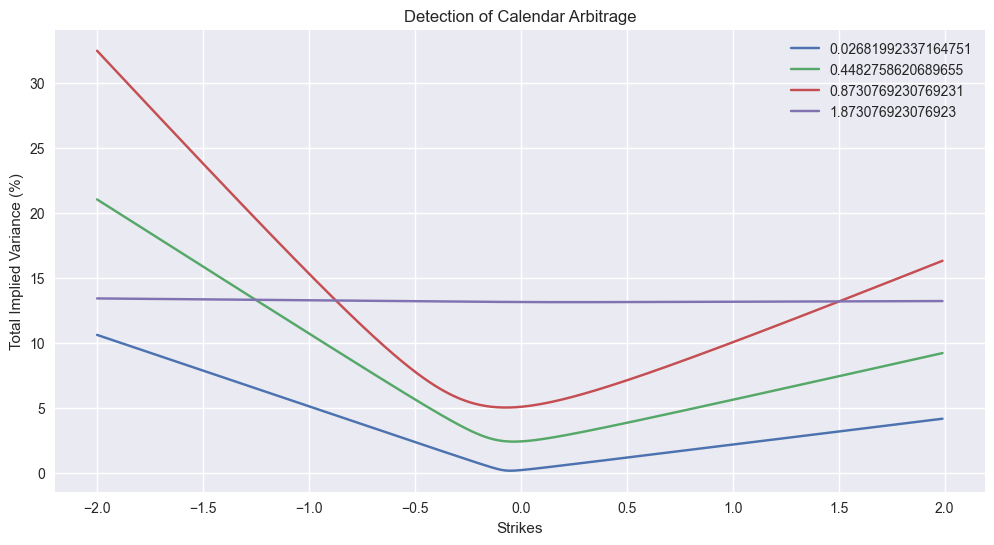

In [77]:
slice_range = [1, 10, 15, 20]

# Display the 5 first volatility smile
plt.plot(simulated_total_var_surface.iloc[slice_range].T * 100)

# Set the title and axis labels for the graph
plt.title('Detection of Calendar Arbitrage')
plt.ylabel('Total Implied Variance (%)')
plt.xlabel('Strikes');

for i, value in enumerate(slice_range):
    slice_range[i] = convert_date_to_DTE(simulated_total_var_surface.index[value])

plt.legend(slice_range);

We can observe that the variance smile intersects, indicating a potential calendar arbitrage opportunity.  
**Our volatility surface is highly arbitrable.**

---

### 2. Butterfly Arbitrage

#### 2.1. Butterfly Spread Payoff
In the real market the butterfly spread is a strategy with options, which combines simultaneous buying and selling of three similar types options (either calls or puts) with strikes $K-\epsilon < K < K+\epsilon$ and which have the following characteristics:
- Same maturity
- Same underlying
- Strikes $K-\epsilon$ and $K+\epsilon$ are equidistant from $K$

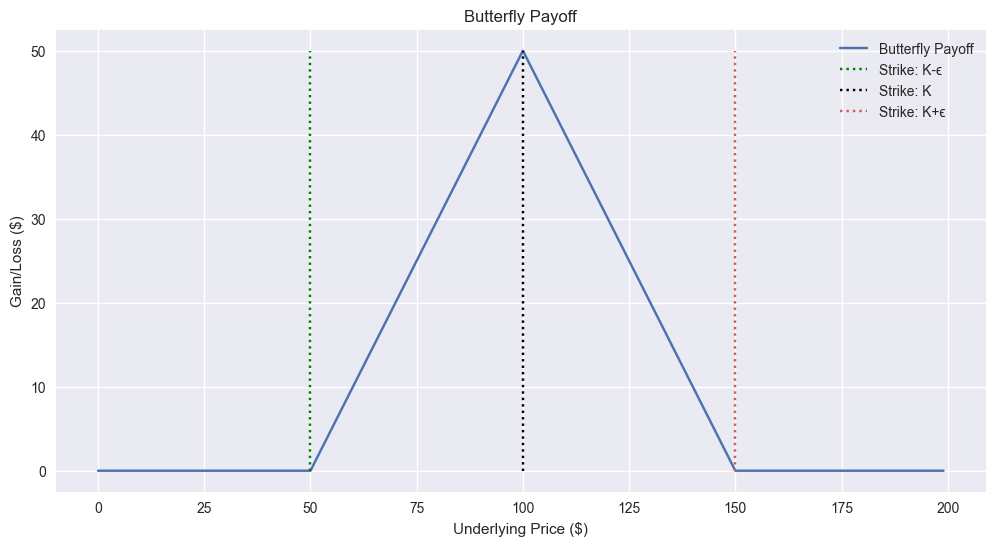

In [78]:
# Initialize the strike of the option
strike = 100

# Set the epsilon for the butterfly strikes
epsilon = 50

# Compute the price change from 0 to 200
underlying_prices = np.arange(0, 200)

# Calculate the butterfly payoff
payoff_butterfly = np.maximum(underlying_prices - (strike-epsilon), 0) \
                    - 2 * np.maximum(underlying_prices - strike, 0) \
                    +  np.maximum(underlying_prices - (strike+epsilon), 0)

# Display a graph of the payoff
plt.plot(underlying_prices, payoff_butterfly, label='Butterfly Payoff')

# Display a vertical line for the strikes
plt.vlines(strike-epsilon, 0, max(payoff_butterfly), colors='green', linestyles=':', label='Strike: K-ϵ')
plt.vlines(strike, 0, max(payoff_butterfly), colors='black', linestyles=':', label='Strike: K')
plt.vlines(strike+epsilon, 0, max(payoff_butterfly), colors='indianred', linestyles=':', label='Strike: K+ϵ')

# Configure the graph title and axis labels
plt.title('Butterfly Payoff')
plt.xlabel('Underlying Price ($)')
plt.ylabel('Gain/Loss ($)')

# Set the graph legend
plt.legend();

#### 2.2. Discounted Risk-Neutral Density

A slice is said to be free of **butterfly arbitrage** if the corresponding density is non-negative. **Breeden** and **Litzenberger** derive an expression for the risk-neutral discounted density $p(k)^{\mathbb{Q}}$ as a function of the second derivative of the Black-Scholes call option price $C_{BS}(K)$ with respect to the exercise value $K$.

Now introduce the function $g: \mathbb{R} \to \mathbb{R}$

$$
	g(k) := \bigg( 1 - \frac{kw'(k)}{2w(k)} \bigg)^2 - \frac{w'(k)^2}{4} \bigg( \frac{1}{w(k)} + \frac{1}{4} \bigg) + \frac{w''(k)}{2}
$$

where:  
$$
	w'(k) = b 
	\bigg(
		\frac{k-m}
		{
			\sqrt{(k-m)^2 + \sigma^2}
		} + \rho
	\bigg)
$$

In [79]:
def get_w_derivative1(
    k: np.ndarray, 
    b: float,
    rho: float, 
    m: float,
    sigma: float,
) -> np.ndarray:
    """
    Calculate the first derivative of the total implied vol with respect to the log-moneyness

    Args:
        k (np.ndarray):
            The log moneyness

        b (float):
            It increases the slopes of both the put and call wings

        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right

        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

    Returns:
        w_prime (np.ndarray):
            The first derivative of the total implied variance
    """
    
    # Calculate the first derivative of the implied total variance wrt the log-moneyness
    w_prime = b * ( (k-m) / np.sqrt((k-m)**2 + sigma**2) + rho)
    
    return w_prime

$$
	w''(k) = \frac{b \sigma^2}
	{\big(
		(k-m)^2 + \sigma^2
	\big)^{\frac{3}{2}}}
$$

In [80]:
def get_w_derivative2(
    k: np.ndarray, 
    b: float,
    m: float,
    sigma: float,
) -> np.ndarray:
    """
    Calculate the second derivative of the total implied vol with respect to the log-moneyness

    Args:
        k (np.ndarray):
            The log moneyness
    
        b (float):
            It increases the slopes of both the put and call wings
        
        m (float):
            Parameter to translate the variance smile to the right
    
        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile
    
    Returns:
        w_prime2 (np.ndarray):
            The second derivative of the total implied variance
    """
    
    # Calculate the second derivative of the implied total variance wrt the log-moneyness
    w_prime2 = (b * sigma**2) / ((k-m)**2 + sigma**2)**(3/2)
    
    return w_prime2

In [81]:
def calculate_g(
    k: np.ndarray,
    a: float,
    b: float,
    rho: float,
    m: float,
    sigma: float,
) -> np.ndarray:
    """
    Calculate the Breeden and Litzenberger density
    
    Args:
        k (np.ndarray):
            The log moneyness
        
        a (float):
            Parameter for vertical translation of the variance smile
        
        b (float):
            It increases the slopes of both the put and call wings
        
        rho (float):
            Parameter for counter-clockwise rotation of the variance smile
        
        m (float):
            Parameter to translate the variance smile to the right
        
        sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

    Returns:
        g_k (np.ndarray)
            The Breeden and Litzenberger density
    """

    # Get the implied total variance
    w_k = parameterization_raw_SVI(k, a, b, rho, m, sigma)
    
    # Get the first derivative of the implied total variance
    w_prime = get_w_derivative1(k, b, rho, m, sigma)
    
    # Get the second derivative of the implied total variance
    w_prime2 = get_w_derivative2(k, b, m, sigma)
    
    # Calculate the g(k) function
    g_k = (1 - (k*w_prime)/(2*w_k))**2 - (w_prime**2)/4 * (1/w_k + 1/4) + w_prime2/2
    
    return g_k

##### Axel Vogt Density

In [82]:
"""
Use the Axel Vogt Example
"""

# General level of variance
a=-0.040998372001772

# Slopes of both the call and put wings
b=0.13308181151379

# Counter-clockwise rotation
rho = 0.30602086142471

# Horizontal translation
m = 0.35858898335748

# ATM curvature of the smile
sigma = 0.4153

# Set a log-moneyness from -2 to 2
moneyness_array = np.arange(-2., 2., 0.01)

In [83]:
# Generate a total variance smile with the Axel Vogt parameters
var_array = parameterization_raw_SVI(moneyness_array, a, b, rho, m, sigma)

# Calculate the Breeden and Litzenberger Density of the Axel Vogt example
density_array = calculate_g(moneyness_array, a, b, rho, m, sigma)

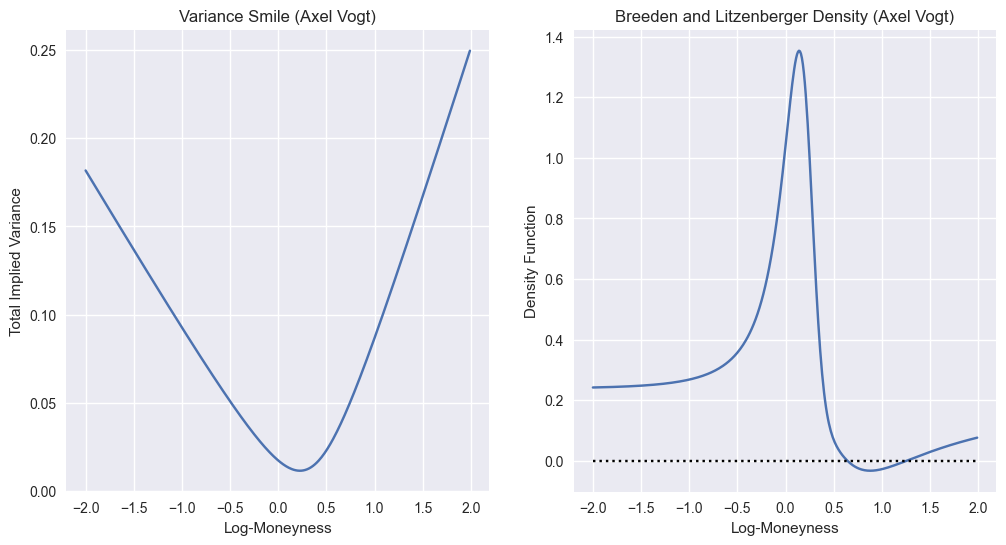

In [84]:
# Generate 2 graphs (1 row and 2 columns)
fig, axs = plt.subplots(1, 2)

# Display the variance smile of the Axel Vogt example
axs[0].plot(moneyness_array, var_array)

# Set the axis labels and title
axs[0].set_xlabel('Log-Moneyness')
axs[0].set_ylabel('Total Implied Variance')
axs[0].set_title('Variance Smile (Axel Vogt)')


# Display the density of the Axel Vogt example
axs[1].plot(moneyness_array, density_array)

# Generate an horizontal line on the 0
axs[1].hlines(0, min(moneyness_array), max(moneyness_array), colors='black', linestyle=':')

# Set the axis labels and title
axs[1].set_xlabel('Log-Moneyness')
axs[1].set_ylabel('Density Function')
axs[1].set_title('Breeden and Litzenberger Density (Axel Vogt)');

As we can see on the right graph, the density falls below 0, indicating a clear **opportunity for butterfly arbitrage**.

#### 2.3. No-arbitrage by conditions
1. $\big( a - mb(\rho+1) \big) \big( 4 - a + mb(\rho+1) \big) - b^2 (\rho+1)^2 > 0$  
2. $\big( a - mb(\rho-1) \big) \big( 4 - a + mb(\rho-1) \big) - b^2 (\rho-1)^2 > 0$  
   
3. $0 < b^2 (\rho - 1)^2 <4$
4. $0 < b^2 (\rho + 1)^2 <4$

---

$$
    \big( a - mb(\rho+1) \big) \big( 4 - a + mb(\rho+1) \big) - b^2 (\rho+1)^2 > 0
$$

In [85]:
def constraint_right1(
    params: tuple[float],
) -> float:
    """
    First contraint for the right wing

    Args:
        params (tuple):
            a (float):
                Parameter for vertical translation of the variance smile
        
            b (float):
                It increases the slopes of both the put and call wings
            
            rho (float):
                Parameter for counter-clockwise rotation of the variance smile
            
            m (float):
                Parameter to translate the variance smile to the right

    Returns:
        constraint (float):
            First contraint for the right wing 
    """

    # Unpack the parameters
    a, b, rho, m, _ = params

    # Calculate the constraint
    constraint = (a - b * m * (rho + 1)) * (4 - a + m * b * (rho + 1)) - (b**2 * (rho + 1)**2)
    
    return constraint

$$
    0 < b^2 (\rho - 1)^2 <4
$$

In [86]:
def constraint_right2(
    params: tuple[float],
) -> float:
    """
    Second contraint for the right wing

    Args:
        params (tuple):
            b (float):
                It increases the slopes of both the put and call wings
            
            rho (float):
                Parameter for counter-clockwise rotation of the variance smile

    Returns:
        constraint (float):
            Second contraint for the right wing 
    """

    # Unpack the parameters
    _, b, rho, _, _ = params

    # Calculate the constraint
    constraint = b**2 * (rho + 1)**2
    
    return 4.0 - constraint

$$
    \big( a - mb(\rho-1) \big) \big( 4 - a + mb(\rho-1) \big) - b^2 (\rho-1)^2 > 0
$$

In [87]:
def constraint_left1(
    params: tuple[float],
) -> float:
    """
    First contraint for the right wing

    Args:
        params (tuple):
            a (float):
                Parameter for vertical translation of the variance smile
        
            b (float):
                It increases the slopes of both the put and call wings
            
            rho (float):
                Parameter for counter-clockwise rotation of the variance smile
            
            m (float):
                Parameter to translate the variance smile to the right

    Returns:
        constraint (float):
            First contraint for the right wing 
    """

    # Unpack the parameters
    a, b, rho, m, _ = params

    # Calculate the constraint
    constraint = ((a - b * m * (rho - 1)) * (4 - a + m * b * (rho - 1))) - (b**2 * (rho - 1)**2)
        
    return constraint

$$
    0 < b^2 (\rho + 1)^2 <4
$$

In [88]:
def constraint_left2(
    params: tuple[float],
) -> float:
    """
    Second contraint for the left wing

    Args:
        params (tuple):
            b (float):
                It increases the slopes of both the put and call wings
            
            rho (float):
                Parameter for counter-clockwise rotation of the variance smile

    Returns:
        constraint (float):
            Second contraint for the left wing 
    """

    # Unpack the parameters
    _, b, rho, _, _ = params

    # Calculate the constraint
    constraint = b**2 * (rho - 1)**2
    
    return 4.0 - constraint

In [89]:
def get_raw_SVI_parameter_no_arbitrage(
    initial_variance: np.ndarray,
    k: np.ndarray,
) -> list[float]:
    """
    Retrieve the raw SVI parameters that best match the provided total implied variance while applying a set of constraints to minimize squared errors.

    Args:
        initial_variance (np.ndarray):
            Initial variance as benchmark

        k (np.ndarray):
            Log-moneyness of the serie

    Returns:
        params (list[float]):
            List of the SVI parameters (a, b, ρ, m, σ)
    """

    # Set the optimial first parameters value
    a = 1/2 * min(initial_variance)
    b = 0.1
    rho = -0.5
    m = 0.1
    sigma = 0.1

    # Pack the variables into a list, it's the parameter to optimize
    params = (a, b, rho, m, sigma)

    # Set the additional parameters, these parameters are not changed
    additional_params = (k, initial_variance)

    # Set the limits of the variables, the parameters boundaries
    bounds = ((0.00001, max(initial_variance)), (0.001, 0.999999), (-0.999999, 0.999999), (2*min(k), 2*max(k)), (0.01, 1.))

    # Set the constraints to avoid butterfly arbitrage
    constraints = ({'type': 'ineq', 'fun': constraint_right1},
                   {'type': 'ineq', 'fun': constraint_left1},
                   {'type': 'ineq', 'fun': constraint_right2},
                   {'type': 'ineq', 'fun': constraint_left2})

    # Minimize the objective function, find the least squares errors
    optimization = minimize(optimization_raw_SVI, x0=params, args=additional_params, bounds=bounds, constraints=constraints, method='SLSQP')

    # Check if the optimization was a success
    if optimization.success == True:
        
        # Return the optimal parameters 
        return optimization.x
        
    else:
        # Error message when the optimization is impossible
        print("Optimization failed")

        # Return the initial parameters
        return params

##### Axel Vogt Example

In [90]:
# General level of variance
a=-0.040998372001772

# Slopes of both the call and put wings
b=0.13308181151379

# Counter-clockwise rotation
rho = 0.30602086142471

# Horizontal translation
m = 0.35858898335748

# ATM curvature of the smile
sigma = 0.4153

# Set a log-moneyness from -2 to 2
moneyness_array = np.arange(-2., 2., 0.01)

In [91]:
"""
Initial Axel Vogt example
"""
# Simulate the initial variance smile 
initial_implied_variance = parameterization_raw_SVI(moneyness_array, a, b, rho, m, sigma)

# Calculate the Breeden and Litzenberger Density of the Axel Vogt example
density_array = calculate_g(moneyness_array, a, b, rho, m, sigma)


"""
Potential Butterfly Arbitrage
"""
# Raw SVI parameterization with potential arbitrage opportunity
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(initial_implied_variance, moneyness_array)

# Simulated the total implied variance with potential arbitrage opportunity
simulated_implied_variance_arb = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

# Calculate the Breeden and Litzenberger Density of the Axel Vogt example with possible arbitrage
density_arb_array = calculate_g(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

"""
No Butterfly Arbitrage
"""
# Raw SVI parameterization with potential arbitrage opportunity
a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na = get_raw_SVI_parameter_no_arbitrage(initial_implied_variance, moneyness_array)

# Simulated the total implied variance with potential arbitrage opportunity
simulated_implied_variance_noarb = parameterization_raw_SVI(moneyness_array, a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na)

# Calculate the Breeden and Litzenberger Density of the Axel Vogt example with possible arbitrage
density_noarb_array = calculate_g(moneyness_array, a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na)

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



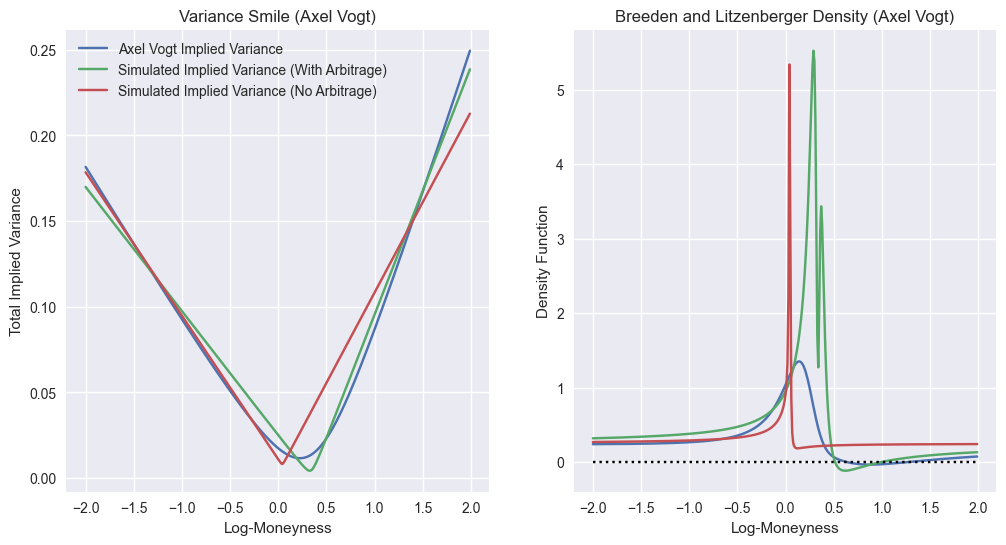

In [92]:
# Generate 2 graphs (1 row and 2 columns)
fig, axs = plt.subplots(1, 2)

# Display the variance smile of the Axel Vogt example (initial, possible abritrage, no arbitrage)
axs[0].plot(moneyness_array, initial_implied_variance, label='Axel Vogt Implied Variance')
axs[0].plot(moneyness_array, simulated_implied_variance_arb, label='Simulated Implied Variance (With Arbitrage)')
axs[0].plot(moneyness_array, simulated_implied_variance_noarb, label='Simulated Implied Variance (No Arbitrage)')

# Set the axis labels and title
axs[0].set_xlabel('Log-Moneyness')
axs[0].set_ylabel('Total Implied Variance')
axs[0].set_title('Variance Smile (Axel Vogt)')

# Set the legend of the graph
axs[0].legend()

# Display the density of the Axel Vogt example (initial, possible abritrage, no arbitrage)
axs[1].plot(moneyness_array, density_array)
axs[1].plot(moneyness_array, density_arb_array)
axs[1].plot(moneyness_array, density_noarb_array)

# Generate an horizontal line on the 0
axs[1].hlines(0, min(moneyness_array), max(moneyness_array), colors='black', linestyle=':')

# Set the axis labels and title
axs[1].set_xlabel('Log-Moneyness')
axs[1].set_ylabel('Density Function')
axs[1].set_title('Breeden and Litzenberger Density (Axel Vogt)');

##### We can fix a buttery arbitrage with the SVI-JW:
Supposing we choose to **fix the SVI-JW parameters** $v_t$, $\psi_t$, and $p_t$ of a given SVI smile, we may guarantee a smile with no butterfly arbitrage by choosing the remaining parameters $c'_t$ and $\hat{v_t}'$ according to SSVI as:

$$
    c'_t = p_t + 2 \psi
$$

$$
    \hat{v_t}' = v_t \frac{4 p_t c_t'}{(p_t + c_t')^2}
$$

That is, given a smile defined in terms of its SVI-JW parameters, we are guaranteed to be able to eliminate butterfly arbitrage by changing the call wing $c_t$ and the minimum variance $\hat{v_t}$, both parameters that are hard to calibrate with available quotes in equity options markets.

In [93]:
def adjust_svi_sw_params(v, psi, p, c, v_hat):
    """
    Adjust the SVI-JW parameters to avoid butterfly arbitrage

    Args:
        v (float):
            ATM implied variance
        
        psi (float):
            ATM skew
        
        p (float):
            Slope of the left wing: OTM put
        
        c (float):
            Slope of the right wing: OTM call
        
        v_hat (float):
            Minimum level of the implied variance

    Returns:
        v (float):
            ATM implied variance
        
        psi (float):
            ATM skew
        
        p (float):
            Slope of the left wing: OTM put
        
        c (float):
            Slope of the right wing: OTM call
        
        v_hat (float):
            Minimum level of the implied variance
    """

    # Calculate the new c parameter
    new_c = p + 2 * psi

    # Calculate the new v hat parameter
    new_v_hat = v * (4 * p * new_c) / (p + new_c)**2

    return v, psi, p, new_c, new_v_hat

In [94]:
# Convert the raw SVI parameters to SVI-JW parameters
v, psi, p, c, v_hat = from_raw_to_jw(a, b, rho, m, sigma)

# Adjust the SVI-JW parameters to avoid butterfly arbitrage
v, psi, p, c, v_hat = adjust_svi_sw_params(v, psi, p, c, v_hat)

#Convert the SVI-JW parameters to raw SVI parameters
a_na, b_na, rho_na, m_na, sigma_na = from_jw_to_raw(v, psi, p, c, v_hat)

# Use parameterizzation to get the total implied variance smile
implied_variance_shifted_jw = parameterization_raw_SVI(moneyness_array, a_na, b_na, rho_na, m_na, sigma_na)

# Calculate the density function of the smile
density_sjw_array = calculate_g(moneyness_array, a_na, b_na, rho_na, m_na, sigma_na)

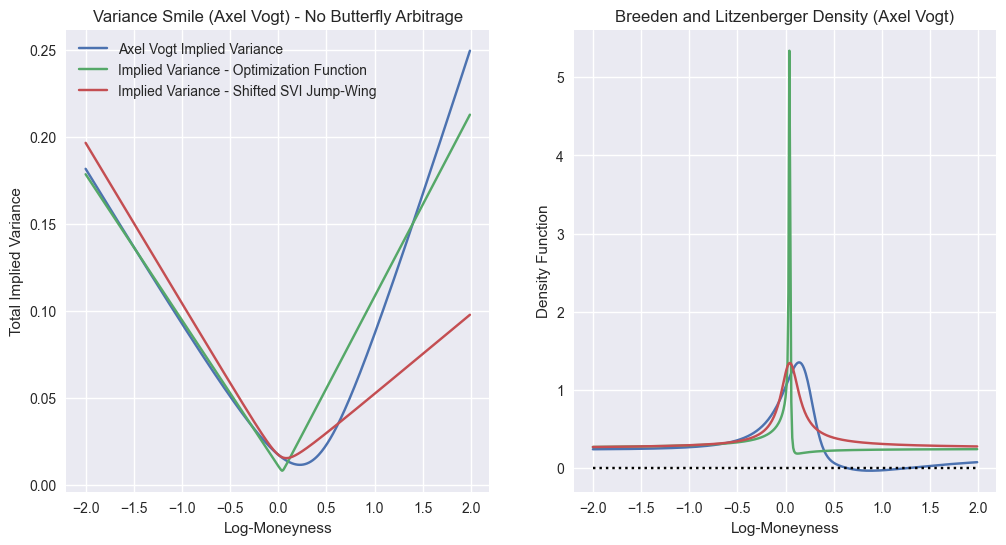

In [95]:
# Generate 2 graphs (1 row and 2 columns)
fig, axs = plt.subplots(1, 2)

# Display the variance smile of the Axel Vogt example (initial, possible abritrage, no arbitrage)
axs[0].plot(moneyness_array, initial_implied_variance, label='Axel Vogt Implied Variance')
axs[0].plot(moneyness_array, simulated_implied_variance_noarb, label='Implied Variance - Optimization Function')
axs[0].plot(moneyness_array, implied_variance_shifted_jw, label='Implied Variance - Shifted SVI Jump-Wing')

# Set the axis labels and title
axs[0].set_xlabel('Log-Moneyness')
axs[0].set_ylabel('Total Implied Variance')
axs[0].set_title('Variance Smile (Axel Vogt) - No Butterfly Arbitrage')

# Set the legend of the graph
axs[0].legend()

# Display the density of the Axel Vogt example (initial, possible abritrage, no arbitrage)
axs[1].plot(moneyness_array, density_array)
axs[1].plot(moneyness_array, density_noarb_array)
axs[1].plot(moneyness_array, density_sjw_array)

# Generate an horizontal line on the 0
axs[1].hlines(0, min(moneyness_array), max(moneyness_array), colors='black', linestyle=':')

# Set the axis labels and title
axs[1].set_xlabel('Log-Moneyness')
axs[1].set_ylabel('Density Function')
axs[1].set_title('Breeden and Litzenberger Density (Axel Vogt)');

In [96]:
# Calculate the square error of the raw SVI model
sq_error_opti = sum((simulated_implied_variance_noarb - initial_implied_variance)**2)

# Calculate the square error of the adjusted SVI-JW model
sq_error_sjw = sum((implied_variance_shifted_jw - initial_implied_variance)**2)

# Display the result of the squared distance
print('The sum of squared distances for the minimization is: ', sq_error_opti)
print('The sum of squared distances for the change in SVI-JW is: ', sq_error_sjw)

The sum of squared distances for the minimization is:  0.09889712144261951
The sum of squared distances for the change in SVI-JW is:  1.0011732340802193


We can see that the minimization of the sum of squared distance give us a much better fit. **However, the fit of the density is not so good**.

In [97]:
# Calculate the square error of the raw SVI model density
sq_error_opti = sum((density_noarb_array - density_array)**2)

# Calculate the square error of the adjusted SVI-JW model density
sq_error_sjw = sum((density_sjw_array - density_array)**2)

# Display the result of the squared distance
print('The sum of squared distances of density for the minimization is: ', sq_error_opti)
print('The sum of squared distances of density for the change in SVI-JW is: ', sq_error_sjw)

The sum of squared distances of density for the minimization is:  54.73482814971162
The sum of squared distances of density for the change in SVI-JW is:  17.989335197550048


We can confirme that the **SVI-JW** with parameters ajustement have a much better density calibration.

##### Market Example

We will now compare the calibration with a market example

In [98]:
# Get the last maturity
maturity = available_expiry[0]

# Get the implied volatility smile for the nearest maturity
volatility_smile = get_market_IV_smile(underlying, maturity)

# Get the log-moneyness
moneyness_array = volatility_smile.index.to_numpy()

# Convert the volatility as variance
market_implied_variance = volatility_smile['Implied Volatility'].to_numpy() ** 2

In [99]:
"""
Potential Butterfly Arbitrage
"""
# Raw SVI parameterization with potential arbitrage opportunity
a_sim, b_sim, rho_sim, m_sim, sigma_sim = get_raw_SVI_parameter(market_implied_variance, moneyness_array)

# Simulated the total implied variance with potential arbitrage opportunity
simulated_implied_variance_arb = parameterization_raw_SVI(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)

# Calculate the Breeden and Litzenberger Density with possible arbitrage
density_arb_array = calculate_g(moneyness_array, a_sim, b_sim, rho_sim, m_sim, sigma_sim)


"""
No Butterfly Arbitrage
"""
# Raw SVI parameterization with potential arbitrage opportunity
a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na = get_raw_SVI_parameter_no_arbitrage(market_implied_variance, moneyness_array)

# Simulated the total implied variance with potential arbitrage opportunity
simulated_implied_variance_noarb = parameterization_raw_SVI(moneyness_array, a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na)

# Calculate the Breeden and Litzenberger Density with possible arbitrage
density_noarb_array = calculate_g(moneyness_array, a_sim_na, b_sim_na, rho_sim_na, m_sim_na, sigma_sim_na)

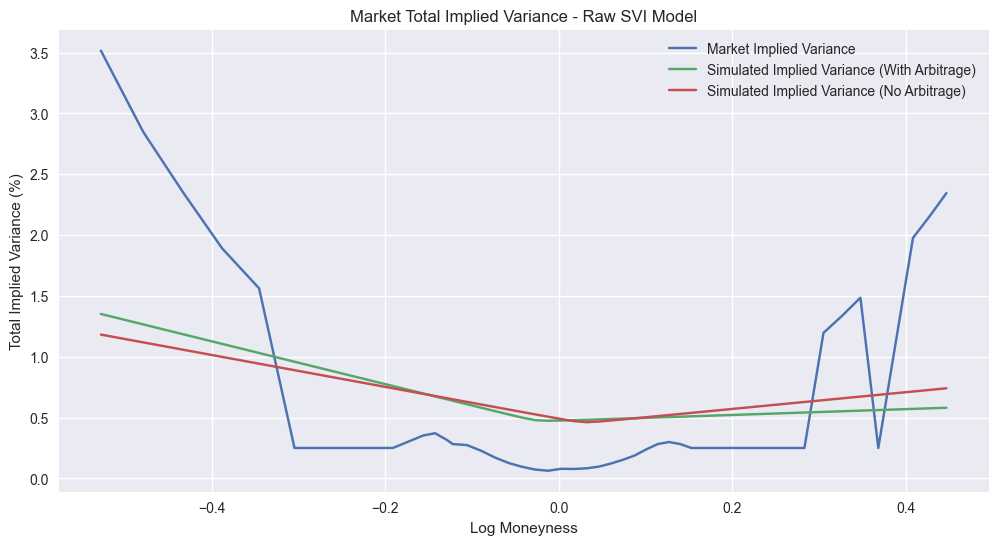

In [100]:
"""
Display the Variance Smile
"""

# Display the initial variance smile
plt.plot(moneyness_array, market_implied_variance, label='Market Implied Variance')

# Display the simulated variance smie with potential butterfly arbitrage
plt.plot(moneyness_array, simulated_implied_variance_arb, label='Simulated Implied Variance (With Arbitrage)')

# Display the simulated variance smie with potential butterfly arbitrage
plt.plot(moneyness_array, simulated_implied_variance_noarb, label='Simulated Implied Variance (No Arbitrage)');

# Set the graph's title, axis label, and legend
plt.title('Market Total Implied Variance - Raw SVI Model')
plt.xlabel('Log Moneyness')
plt.ylabel('Total Implied Variance (%)')
plt.legend();

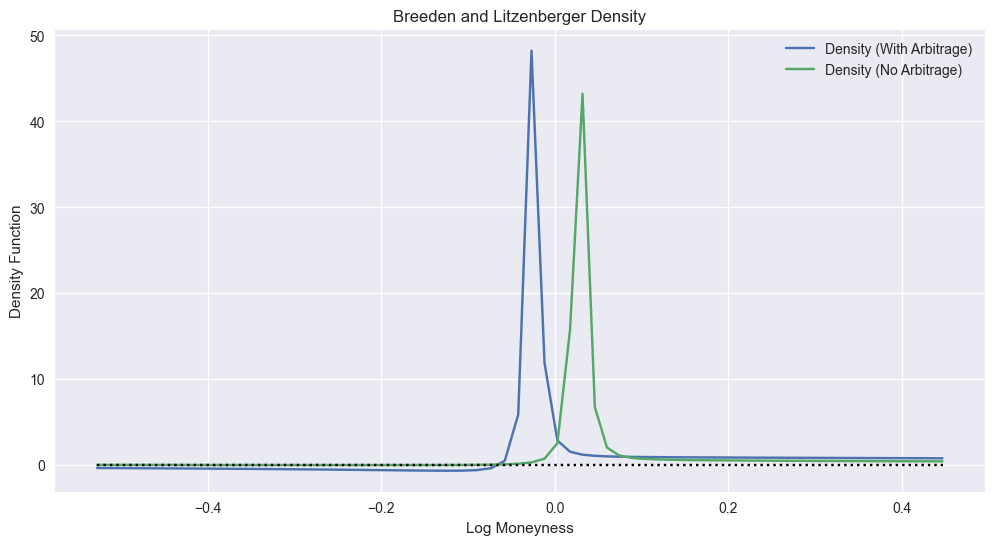

In [101]:
"""
Display the Breeden and Litzenberger Density
"""

# Display the simulated variance smie with potential butterfly arbitrage
plt.plot(moneyness_array, density_arb_array, label='Density (With Arbitrage)')

# Display the simulated variance smie with potential butterfly arbitrage
plt.plot(moneyness_array, density_noarb_array, label='Density (No Arbitrage)')

plt.hlines(0.0, min(moneyness_array), max(moneyness_array), colors='black', linestyles=':')

# Set the graph's title, axis label, and legend
plt.title('Breeden and Litzenberger Density')
plt.xlabel('Log Moneyness')
plt.ylabel('Density Function')
plt.legend();

Our second model enables us to achieve a positive density, indicating that our total variance slice is free from butterfly arbitrage.

### 3. Surface Free of Static Arbitrage
Now, we will integrate both the **butterfly arbitrage** constraint and the **calendar spread** constraint to prevent the entire volatility surface from being susceptible to static arbitrage. This entails ensuring a smile free from butterfly arbitrage, meaning no negative density, while also calibrating each total variance slice to be free from term structure arbitrage relative to each other.

In [102]:
def calendar_arbitrage(
    params: tuple[float],
    old_slice: np.ndarray,
    k: np.ndarray,
) -> np.ndarray:
    """
    No calendar spread arbitrage condition
    Allow a calibration which avoid calendar arbitrage:

    Args:
        params (tuple):
            a (float):
                Parameter for vertical translation of the variance smile
        
            b (float):
                It increases the slopes of both the put and call wings
            
            rho (float):
                Parameter for counter-clockwise rotation of the variance smile
            
            m (float):
                Parameter to translate the variance smile to the right

            sigma (float):
            Parameter to reduce the ATM curvature of the variance smile

        old_slice (np.ndarray):
            Total variance smile with a nearest maturity (ideally the previous one)

        k (np.ndarray):
            Log-moneyness of the serie

    Returns:
        constraint (np.ndarray):
            Calendar spread contraint, the new total variance need to be higher than the previous total variance
    """

    # Unpack the parameters
    a, b, rho, m, sigma = params

    # alculate the total variance with the raw SVI model
    new_slice = parameterization_raw_SVI(k, a, b, rho, m, sigma)

    # Calculate the calendar spread constraint, need to be positive for every strike
    constraint = new_slice - old_slice
        
    return constraint

In [103]:
def get_SVI_parameter_no_static_arbitrage(
    initial_variance: np.ndarray,
    past_variance: np.ndarray,
    k: np.ndarray,
) -> list[float]:
    """
    Retrieve the raw SVI parameters that best match the provided total implied variance while applying a set of constraints to prevent static arbitrage.

    Args:
        initial_variance (np.ndarray):
            Initial variance as benchmark

        k (np.ndarray):
            Log-moneyness of the serie

    Returns:
        params (list[float]):
            List of the SVI parameters (a, b, ρ, m, σ)
    """

    # Set the optimial first parameters value
    a = 1/2 * min(initial_variance)
    b = 0.1
    rho = -0.5
    m = 0.1
    sigma = 0.1

    # Pack the variables into a list, it's the parameter to optimize
    params = (a, b, rho, m, sigma)

    # Set the additional parameters, these parameters are not changed
    additional_params = (k, initial_variance)

    # Set the limits of the variables, the parameters boundaries
    bounds = ((0.00001, max(initial_variance)), (0.001, 0.999999), (-0.999999, 0.999999), (2*min(k), 2*max(k)), (0.01, 1.))

    # Set the constraints to avoid butterfly arbitrage
    constraints = ({'type': 'ineq', 'fun': constraint_right1},
                   {'type': 'ineq', 'fun': constraint_left1},
                   {'type': 'ineq', 'fun': constraint_right2},
                   {'type': 'ineq', 'fun': constraint_left2},
                   {'type': 'ineq', 'fun': calendar_arbitrage, 'args': [past_variance, k]})

    # Minimize the objective function, find the least squares errors
    optimization = minimize(optimization_raw_SVI, x0=params, args=additional_params, bounds=bounds, constraints=constraints, method='SLSQP')

    # Check if the optimization was a success
    if optimization.success == True:
        
        # Return the optimal parameters 
        return optimization.x
        
    else:
        # Error message when the optimization is impossible
        print("Optimization failed")

        # Return the initial parameters
        return params

In [104]:
def generate_vol_surface(
    ticker: str,
    logmoneyness: tuple[float]=(-2, 2, 0.01),
) -> pd.core.frame.DataFrame:
    """
    Download a volatility surface from Yahoo Finance and make it unarbitrable
    Use the SVI model to avoid static arbitrage (calendar spread and butterlfy arbitrage)

    Args:
        ticker (str):
            Ticker of the underlying

        logmoneyness (tuple[float]):
            Log-moneyness range (start, end, step)

    Returns:
        simulated_total_var_surface (pd.core.frame.DataFrame):
            Total implied variance with no static arbitrage
    """

    # Get the implied volatility surface
    vol_surface = get_IV_surface(underlying)

    # Convert the implied volatility surface to a total implied variance surface
    total_var_surface = from_svol_to_stvar(vol_surface)
    
    # Get the current price of the underlying
    real_strike_array = total_var_surface.columns.to_numpy()

    # Generate the wanted log-moneyness strike
    sim_strike_array = np.arange(logmoneyness[0], logmoneyness[1], logmoneyness[2])
    
    # Initialize a DataFrame to save the total implied variance slices for every maturity
    simulated_total_var_surface = pd.DataFrame(index=total_var_surface.index, columns=sim_strike_array)
    
    # Get the current price of the underlying
    current_price = yf.Ticker(ticker).get_info()['currentPrice']
    
    # Get the slice for the 5th maturity to 10th maturity
    for maturity in total_var_surface.index:
    
        # Get the volatility slice according to a fixe maturity
        market_variance_array = total_var_surface.loc[maturity].to_numpy()
    
        # convert the date as day-to-expiry
        time = convert_date_to_DTE(maturity)
    
        # Convert the strike as log-moneyness
        moneyness_array = strike_to_logmoneyness(current_price, real_strike_array, time)
        
        # Try to calibrate our model with the optimization function
        a, b, rho, m, sigma = get_raw_SVI_parameter(market_variance_array, moneyness_array)
        
        # Convert the raw SVI parameters to SVI-JW parameters
        v, psi, p, c, v_hat = from_raw_to_jw(a, b, rho, m, sigma)
        
        # Adjust the SVI-JW parameters to avoid butterfly arbitrage
        v, psi, p, c, v_hat = adjust_svi_sw_params(v, psi, p, c, v_hat)
        
        #Convert the SVI-JW parameters to raw SVI parameters
        a_na, b_na, rho_na, m_na, sigma_na = from_jw_to_raw(v, psi, p, c, v_hat)
        
        # Use parameterization to get the total implied variance smile
        total_variance_array = parameterization_raw_SVI(sim_strike_array, a_na, b_na, rho_na, m_na, sigma_na)

        # Add the simulated total variance to the DataFrame
        simulated_total_var_surface.loc[maturity] = total_variance_array

    # Set the nearest maturity as the initial total variance slice
    past_slice_array = simulated_total_var_surface.iloc[0].to_numpy()
    
    # Get the slice for the 5th maturity to 10th maturity
    for maturity in total_var_surface.index[1:]:

        # Get the total variance slice to calibrate and avoid static arbitrage
        slice_array = simulated_total_var_surface.loc[maturity].to_numpy()

        # Get the raw SVI parameters with no static arbitrage
        a, b, rho, m, sigma = get_SVI_parameter_no_static_arbitrage(slice_array, past_slice_array, sim_strike_array)

        # Calculate the total variance smile with the raw SVI model
        slice_no_static_arbitrage = parameterization_raw_SVI(sim_strike_array, a, b, rho, m, sigma)

        # Add the simulated total variance to the DataFrame
        simulated_total_var_surface.loc[maturity] = slice_no_static_arbitrage

        # Set the previous slice as the current total implied variance with no arbitrage
        past_slice_array = simulated_total_var_surface.loc[maturity].to_numpy()

    return simulated_total_var_surface

In [105]:
# Generate a total implied variance with no static arbitrage, using SVI model
total_var_surface = generate_vol_surface(underlying)

# Display the DataFrame
total_var_surface

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\verdo\anaconda3\envs\UniversityProjects\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



-2.00     -1.99     -1.98     -1.97     -1.96     -1.95  \
2024-03-08  0.061992  0.061685  0.061377   0.06107  0.060762  0.060455   
2024-03-15   0.11099   0.11044  0.109889  0.109339  0.108788  0.108237   
2024-03-22  0.123415  0.122804  0.122192  0.121581  0.120969  0.120357   
2024-03-28  0.123416  0.122804  0.122192  0.121581  0.120969  0.120358   
2024-04-05  0.136874  0.136198  0.135523  0.134847  0.134171  0.133495   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.372295  0.370562  0.368829  0.367097  0.365365  0.363632   
2025-09-19  0.372613  0.370869  0.369125  0.367381  0.365637  0.363894   
2025-12-19  0.372661  0.370913  0.369165  0.367418  0.365671  0.363925   
2026-01-16  0.372661  0.370913  0.369165  0.367418  0.365671  0.363925   
2026-06-18  0.372661  0.370964  0.369269  0.367574  0.365879  0.364186   

               -1.94     -1.93     -1.92     -1.91  ...      1.90      1.91  \
2024-03-08  0.060147   0.05984  0.059532  0.059225  ...  0.057701  0.058002   
2024-03-15  0.107687  0.107136  0.106586  0.106035  ...  0.133617  0.134314   
2024-03-22  0.119746  0.119134  0.118523  0.117911  ...  0.147102  0.147868   
2024-03-28  0.119746  0.119134  0.118523  0.117911  ...  0.147102  0.147868   
2024-04-05  0.132819  0.132143  0.131468  0.130792  ...  0.162119  0.162962   
...              ...       ...       ...       ...  ...       ...       ...   
2025-06-20    0.3619  0.360168  0.358436  0.356704  ...  0.384092  0.385967   
2025-09-19  0.362151  0.360408  0.358665  0.356923  ...   0.38434  0.386226   
2025-12-19  0.362179  0.360433  0.358688  0.356943  ...  0.384436  0.386328   
2026-01-16  0.362179  0.360433  0.358688  0.356943  ...  0.384436  0.386328   
2026-06-18  0.362493    0.3608  0.359108  0.357417  ...  0.384912  0.386749   

                1.92      1.93      1.94      1.95      1.96      1.97  \
2024-03-08  0.058303  0.058604  0.058905  0.059207  0.059508  0.059809   
2024-03-15  0.135011  0.135708  0.136405  0.137101  0.137798  0.138495   
2024-03-22  0.148634  0.149401  0.150167  0.150934    0.1517  0.152467   
2024-03-28  0.148635  0.149401  0.150168  0.150934    0.1517  0.152467   
2024-04-05  0.163804  0.164646  0.165488   0.16633  0.167172  0.168015   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.387842  0.389717  0.391592  0.393467  0.395342  0.397217   
2025-09-19  0.388112  0.389999  0.391885  0.393772   0.39566  0.397547   
2025-12-19   0.38822  0.390112  0.392005  0.393898  0.395791  0.397685   
2026-01-16   0.38822  0.390112  0.392005  0.393898  0.395791  0.397685   
2026-06-18  0.388588  0.390427  0.392266  0.394107  0.395948  0.397789   

                1.98      1.99  
2024-03-08   0.06011  0.060411  
2024-03-15  0.139192  0.139889  
2024-03-22  0.153233  0.153999  
2024-03-28  0.153233     0.154  
2024-04-05  0.168857  0.169699  
...              ...       ...  
2025-06-20  0.399092  0.400968  
2025-09-19  0.399435  0.401323  
2025-12-19   0.39958  0.401474  
2026-01-16   0.39958  0.401474  
2026-06-18  0.399631  0.401474  

[22 rows x 400 columns]

In [106]:
"""
Display the total variance surface in a 3D graph
"""

# Set the values for the graph
fig = go.Figure(data=[go.Surface(x=total_var_surface.columns, y=total_var_surface.index, z=total_var_surface.values)])

# Manage the design
fig.update_layout(title='Total Implied Variance Surface - Free of Static Arbitrage',
                  autosize=True,
                  scene=dict(xaxis_title='Strikes',
                             yaxis_title='Expiry Dates',
                             zaxis_title='Total Implied Variance'),
                  width=1000,
                  height=500)

# Set the render default to save and display the graph
pio.renderers.default = 'iframe'

# Display the figure
fig.show()

Thanks to the SVI model, a blend of the Raw SVI and the Jump-Wings SVI, we've calibrated the total variance surface to eliminate static arbitrage opportunities. A total variance surface can be prone to arbitrage through smile arbitrage due to butterfly arbitrage and through the term structure via calendar spread arbitrage. 

With our model and simulations, we can achieve a total variance surface that is free of static arbitrage. 

To conclude this project, we will convert the total variance surface into an implied volatility surface.

In [107]:
# Initialize the available maturities list for DTE format
available_dte = []

# Convert every maturity date in DTE format
for maturity in total_var_surface.index:

    # Add to the list the available maturity as DTE
    available_dte.append(convert_date_to_DTE(maturity))

# For every variance smile, convert as total variance smile
for index, dte in enumerate(available_dte):

    # Multiply the variance by time to get the total variance
    total_var_surface.iloc[index] /= dte

# Convert the variance as volatility
implied_vol_surface = total_var_surface ** 0.5

implied_vol_surface

-2.00     -1.99     -1.98     -1.97     -1.96     -1.95  \
2024-03-08  2.844286  2.837224  2.830145  2.823047  2.815932  2.808799   
2024-03-15  2.034294  2.029242  2.024177    2.0191   2.01401  2.008907   
2024-03-22  1.638379  1.634314  1.630239  1.626154  1.622059  1.617953   
2024-03-28  1.418879  1.415359   1.41183  1.408293  1.404746   1.40119   
2024-04-05  1.274295  1.271145  1.267987  1.264821  1.261648  1.258466   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.535939   0.53469  0.533439  0.532184  0.530927  0.529667   
2025-09-19  0.490911  0.489761  0.488608  0.487452  0.486294  0.485133   
2025-12-19  0.455496  0.454427  0.453355  0.452281  0.451205  0.450126   
2026-01-16  0.446045  0.444998  0.443948  0.442897  0.441843  0.440786   
2026-06-18    0.4032  0.402281  0.401361  0.400438  0.399514  0.398589   

               -1.94     -1.93     -1.92     -1.91  ...      1.90      1.91  \
2024-03-08  2.801647  2.794478   2.78729  2.780083  ...  2.744082  2.751233   
2024-03-15  2.003791  1.998662   1.99352  1.988364  ...  2.232043  2.237856   
2024-03-22  1.613837   1.60971  1.605573  1.601425  ...  1.788703  1.793357   
2024-03-28  1.397626  1.394052  1.390469  1.386877  ...  1.549064  1.553094   
2024-04-05  1.255277  1.252079  1.248873  1.245659  ...   1.38684  1.390438   
...              ...       ...       ...       ...  ...       ...       ...   
2025-06-20  0.528404  0.527138  0.525869  0.524597  ...  0.544364  0.545691   
2025-09-19   0.48397  0.482804  0.481635  0.480464  ...  0.498576  0.499798   
2025-12-19  0.449045  0.447961  0.446876  0.445787  ...  0.462637  0.463774   
2026-01-16  0.439728  0.438667  0.437603  0.436538  ...  0.453038  0.454151   
2026-06-18  0.397661  0.396732    0.3958  0.394867  ...  0.409774  0.410751   

                1.92      1.93      1.94      1.95      1.96      1.97  \
2024-03-08  2.758365  2.765478  2.772574  2.779651   2.78671  2.793751   
2024-03-15  2.243653  2.249436  2.255203  2.260956  2.266695  2.272419   
2024-03-22  1.797998  1.802628  1.807246  1.811852  1.816446  1.821029   
2024-03-28  1.557114  1.561123  1.565122  1.569111   1.57309  1.577059   
2024-04-05  1.394026  1.397605  1.401174  1.404735  1.408287   1.41183   
...              ...       ...       ...       ...       ...       ...   
2025-06-20  0.547015  0.548335  0.549653  0.550967  0.552279  0.553587   
2025-09-19  0.501017  0.502233  0.503446  0.504657  0.505865   0.50707   
2025-12-19  0.464908   0.46604  0.467169  0.468296   0.46942  0.470542   
2026-01-16  0.455262   0.45637  0.457476  0.458579   0.45968  0.460778   
2026-06-18  0.411726  0.412699   0.41367  0.414639  0.415607  0.416572   

                1.98      1.99  
2024-03-08  2.800775  2.807781  
2024-03-15  2.278128  2.283824  
2024-03-22    1.8256   1.83016  
2024-03-28  1.581018  1.584967  
2024-04-05  1.415364  1.418889  
...              ...       ...  
2025-06-20  0.554892  0.556194  
2025-09-19  0.508272  0.509472  
2025-12-19  0.471661  0.472778  
2026-01-16  0.461874  0.462968  
2026-06-18  0.417535  0.418497  

[22 rows x 400 columns]

In [108]:
"""
Display the implied volatility surface in a 3D graph
"""

# Set the values for the graph
fig = go.Figure(data=[go.Surface(x=implied_vol_surface.columns, y=implied_vol_surface.index, z=implied_vol_surface.values)])

# Manage the design
fig.update_layout(title='Implied Volatility Surface - Free of Static Arbitrage',
                  autosize=True,
                  scene=dict(xaxis_title='Strikes',
                             yaxis_title='Expiry Dates',
                             zaxis_title='Implied Volatility'),
                  width=1000,
                  height=500)

# Set the render default to save and display the graph
pio.renderers.default = 'iframe'

# Display the figure
fig.show()

In our exploration of the **Stochastic Volatility Inspired (SVI)** model as an implied volatility model, we also delved into various non-parametric interpolation methods. We meticulously outlined the static arbitrage characterization, focusing particularly on **calendar spread** and **butterfly arbitrage**. Additionally, we established the boundaries and initial guess for SVI's parameters, which proved instrumental in our analysis. A significant aspect of our contribution lies in the provision of sufficient conditions ensuring an **SVI static arbitrage-free environment**. By guaranteeing a positive probability density function, these conditions facilitate the automatic elimination of arbitrage, including both butterfly and calendar spread, throughout the calibration process.

## V. References
[1] **Jim Gatheral, Antoine Jacquier - Arbitrage-free SVI volatility surfaces** (March 22, 2013)  
  
[2] **Jim Gatheral, Antoine Jacquier - Baruch College: Arbitrage-free SVI volatility surface** (December 26, 2012)  
  
[3] **Fabien Le Floc'h - Initial guesses for SVI calibration** (September, 2014)  
  
[4] **Souleymane Dieye, Julien Messias - From Volatility Modelling to Structured Products Pricing** (April 20, 2021)  
  
[5] **Tahar Ferhati - Stochastic Volatility Inspired Model (SVI)** (June 2, 2022)  
  
[6] **Alexander Aurel - The SVI implied volatility model and its calibration** (September 2014)  